# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import chi2_contingency

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,KBinsDiscretizer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Model Validation
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold

#Model Building
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras.wrappers.scikit_learn import KerasClassifier

#Model Accuracy
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
train = pd.read_csv(r"E:\ExcelR Project\train.csv")
test = pd.read_csv(r"E:\ExcelR Project\test.csv")

In [ ]:
train_original = train.copy()
test_original = test.copy()

In [ ]:
print('Train size :' + str(train.shape)+'\n'+'Test size : ' + str(test.shape))

Train size :(614, 13)
Test size : (367, 12)


In [ ]:
train.duplicated().sum()

0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


### Inferences 1 - Data : 

- There are **614 records in the Train Dataset & 367 records in the Test Dataset.**
- There are no duplicated data in Train set.

##### 1. Training Dataset has:
- Loan_ID | Gender | Married | Dependents | Education | Self_Employed | Property_Area | Loan_status as **Object types.** 
- ApplicantIncome field is of **Integer type.**
- The other 3 fields namely CoapplicantIncome | Loan_Amount_Term | Credit_History are **Floating point type.**

##### 2. Testing Dataset has:
- CoapplicantIncome is of **Integer Type not Floating**
- There is no column as ***Loan_status*** so thats what we have to ***predict by creating a model.***

##### 3. Null Values in Train Data : 
- 50 | Credit_History       
- 32 | Self_Employed        
- 22 | LoanAmount           
- 15 | Dependents           
- 14 | Loan_Amount_Term     
- 13 | Gender               
- 03 | Married     

##### 4. Null Values in Test Data : 
- 29 | Credit_History       
- 23 | Self_Employed        
- 11 | Gender           
- 10 | Dependents           
- 06 | Loan_Amount_Term     
- 05 | Loan_Amount     

#### Hypothesis Generation:

 - Salary: Applicants with **higher income** should **have higher chances** of loan approval
 - Credit history: Applicants who have **followed Credit guidelines** should **have better chances**
 - Loan Amount: **Lower Loan Amounts** should **have better chances** of approval
 - Loan Amount Terms: **Shorter tenures** should **have better chances** of approval
 - EMI: **Lower the expected monthly installment** for the applicant, compared to income, the **better** the approval chances

 ## Data Visualization

### 1. Univariate Analysis

#### 1.1 Independent Variable [Categorical Type]
Gender | Married | Self_Employed

In [1]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,3, figsize=(20, 8))
fig.suptitle('Univariate Analysis of Categorical Data',fontsize=20)
g = pd.crosstab(train.Gender, train.Loan_Status)
m = pd.crosstab(train.Married, train.Loan_Status)
s = pd.crosstab(train.Self_Employed, train.Loan_Status)
g.plot(kind='bar',stacked=True,ax=axes[0,0],color=['steelblue','tomato'],edgecolor='black')
m.plot(kind='bar',stacked=True,ax=axes[0,1],color=['steelblue','tomato'],edgecolor='black')
s.plot(kind='bar',stacked=True,ax=axes[0,2],color=['steelblue','tomato'],edgecolor='black')
g.div(g.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],color=['teal','saddlebrown'],edgecolor='black')
m.div(m.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],color=['teal','saddlebrown'],edgecolor='black')
s.div(s.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,2],color=['teal','saddlebrown'],edgecolor='black')
train['Gender'].value_counts(normalize=True),train['Married'].value_counts(normalize=True),train['Self_Employed'].value_counts(normalize=True)
plt.savefig('IndependentCategory.png')

NameError: ignored

- 80% are Male Applicants, however both Male and Female have got equal proportion of Loan Approval
- 65% are Married and those who are Married have more chances to get Loan Approved
- 85% are Self_Employed, however equal proportion of Loan Approval

#### 1.2 Independent Variable [Ordinal Type]
Dependents | Education | Property_Area

(0     0.575960
 1     0.170284
 2     0.168614
 3+    0.085142
 Name: Dependents, dtype: float64,
 Graduate        0.781759
 Not Graduate    0.218241
 Name: Education, dtype: float64,
 Semiurban    0.379479
 Urban        0.328990
 Rural        0.291531
 Name: Property_Area, dtype: float64)

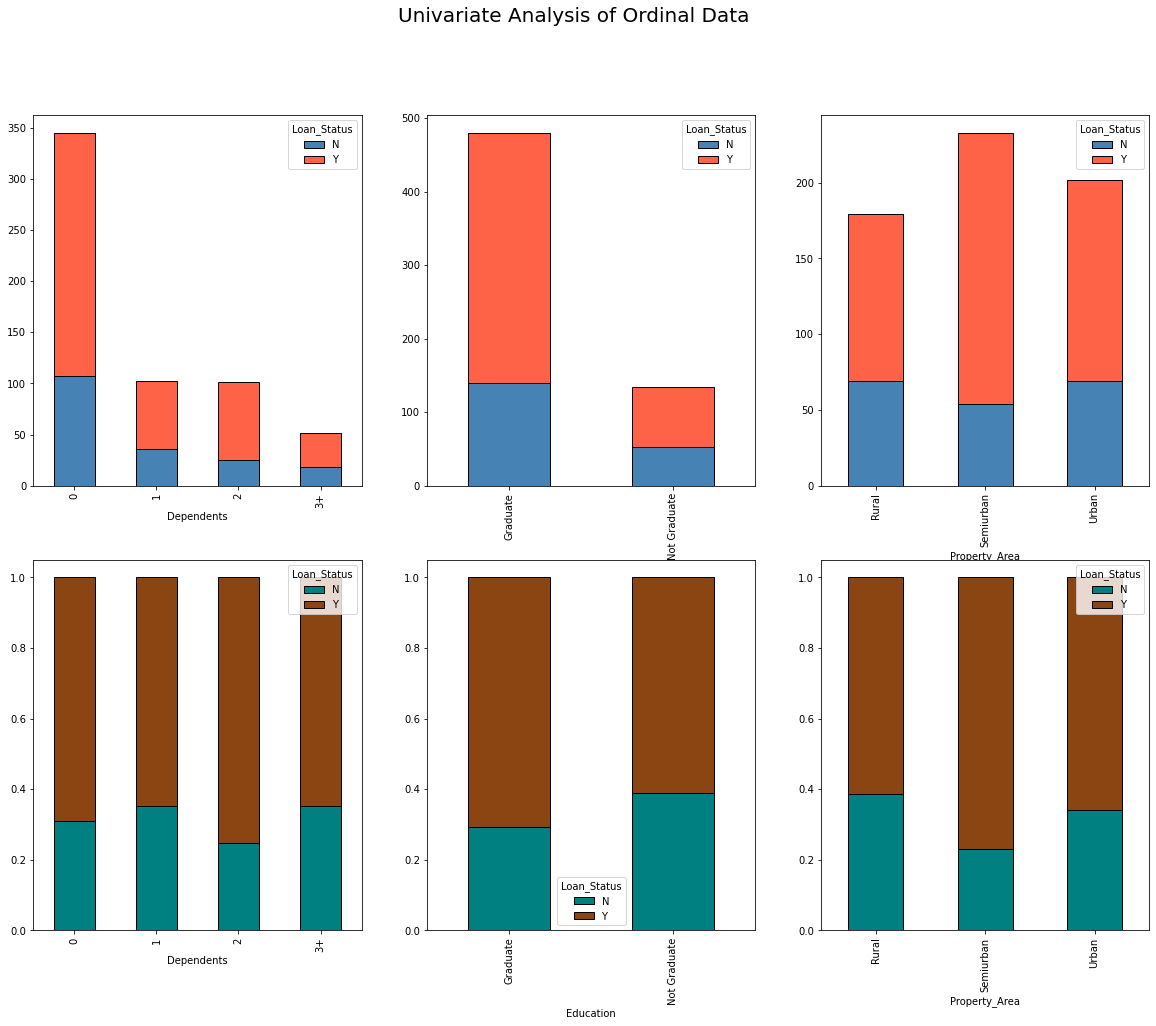

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(20, 15))
fig.suptitle('Univariate Analysis of Ordinal Data',fontsize=20)
d = pd.crosstab(train.Dependents, train.Loan_Status)
e = pd.crosstab(train.Education, train.Loan_Status)
p = pd.crosstab(train.Property_Area, train.Loan_Status)
d.plot(kind='bar',stacked=True,ax=axes[0,0],color=['steelblue','tomato'],edgecolor='black')
e.plot(kind='bar',stacked=True,ax=axes[0,1],color=['steelblue','tomato'],edgecolor='black')
p.plot(kind='bar',stacked=True,ax=axes[0,2],color=['steelblue','tomato'],edgecolor='black')
d.div(d.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],color=['teal','saddlebrown'],edgecolor='black')
e.div(e.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],color=['teal','saddlebrown'],edgecolor='black')
p.div(p.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,2],color=['teal','saddlebrown'],edgecolor='black')
train['Dependents'].value_counts(normalize=True),train['Education'].value_counts(normalize=True),train['Property_Area'].value_counts(normalize=True)
plt.savefig('IndependentOrdinal.jpg')

- 57% are Parents have no Dependents (Newly Married or No Child)
    - However Bank has preferred to give Loan to Couple having 2 Dependents
- 78% are Graduate 
    - Those who are Graduate have greater chances of Loan Approval
- 37% are having Property in Semi-Urban area
    - Those having property in Semi-Urban area have greater chances of Loan Approval

#### 1.3 Independent Variable [Numerical Type]

(1.0    0.842199
 0.0    0.157801
 Name: Credit_History, dtype: float64,
 360.0    0.853333
 180.0    0.073333
 480.0    0.025000
 300.0    0.021667
 84.0     0.006667
 240.0    0.006667
 120.0    0.005000
 36.0     0.003333
 60.0     0.003333
 12.0     0.001667
 Name: Loan_Amount_Term, dtype: float64)

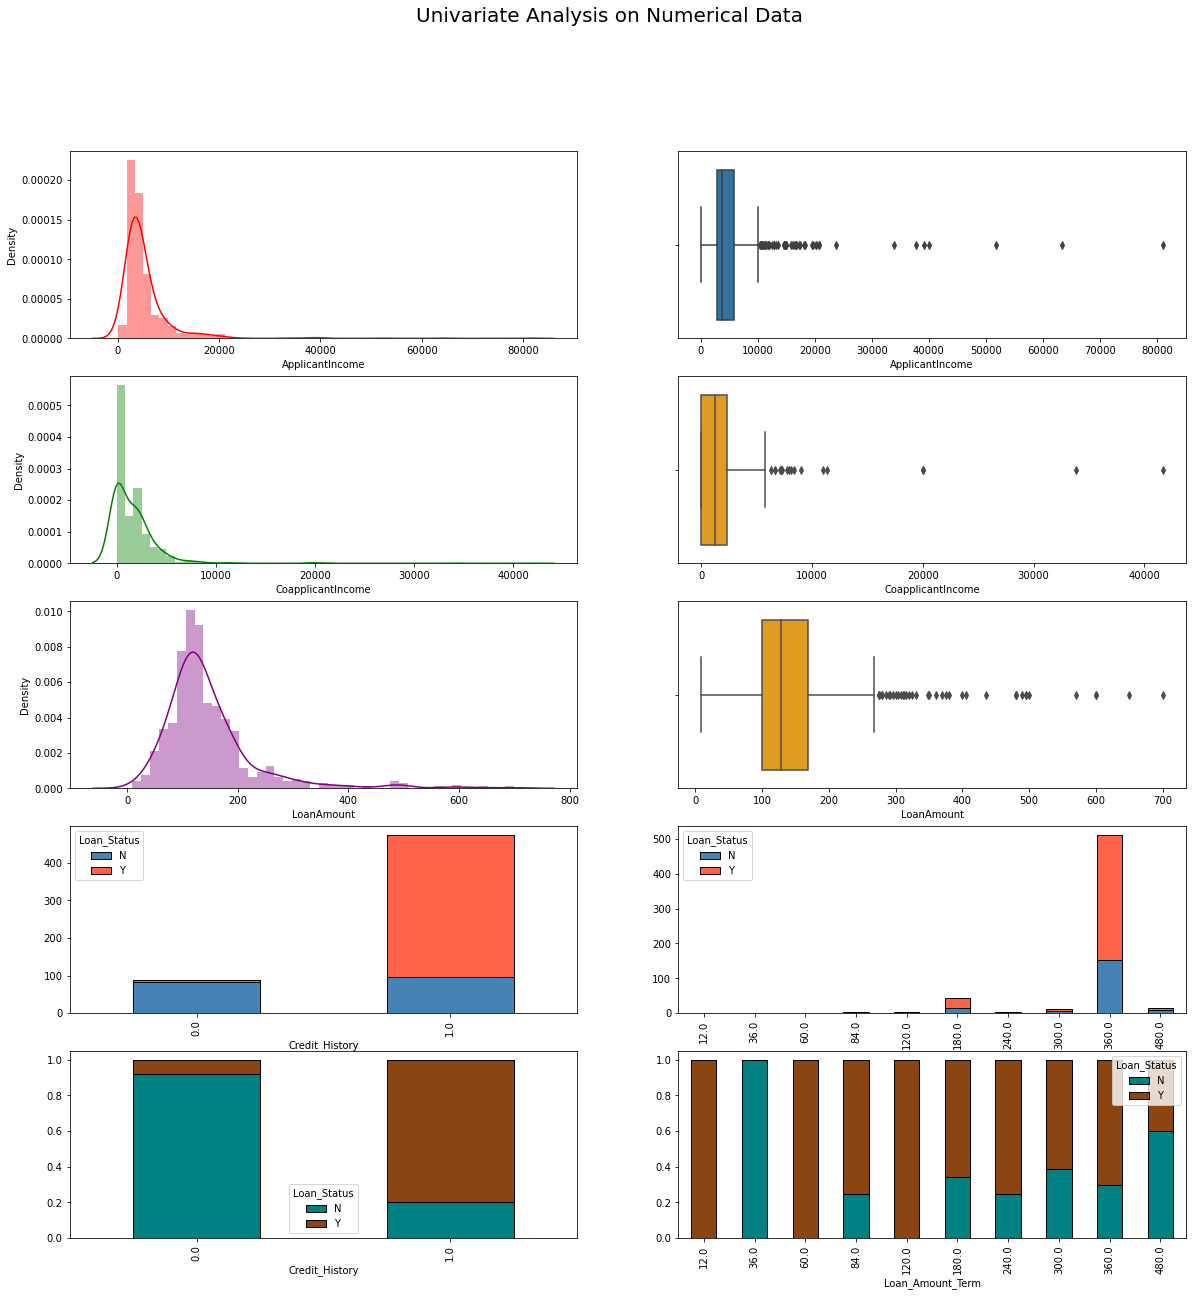

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(20, 20))
fig.suptitle('Univariate Analysis on Numerical Data',fontsize=20)
sns.distplot(train['ApplicantIncome'],ax=axes[0,0],color='red')
sns.boxplot(train['ApplicantIncome'],data=train,ax=axes[0,1])
sns.distplot(train['CoapplicantIncome'],ax=axes[1,0],color='green')
sns.boxplot(train['CoapplicantIncome'],ax=axes[1,1],color='orange')
sns.distplot(train['LoanAmount'],ax=axes[2,0],color='purple')
sns.boxplot(train['LoanAmount'],ax=axes[2,1],color='orange')
c = pd.crosstab(train.Credit_History, train.Loan_Status)
l = pd.crosstab(train.Loan_Amount_Term, train.Loan_Status)
c.plot(kind='bar',stacked=True,ax=axes[3,0],color=['steelblue','tomato'],edgecolor='black')
l.plot(kind='bar',stacked=True,ax=axes[3,1],color=['steelblue','tomato'],edgecolor='black')
c.div(c.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[4,0],color=['teal','saddlebrown'],edgecolor='black')
l.div(l.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[4,1],color=['teal','saddlebrown'],edgecolor='black')
train['Credit_History'].value_counts(normalize=True),train['Loan_Amount_Term'].value_counts(normalize=True)
plt.savefig('IndependentNumerical.png')

- Most of the data seems to be right skewed as data congestion towards left side.
- Also from the data we can conclude that if mean>median (Right Skew) else vice versa.
- 84% have Credit History as per guidelines, and mostly those whose Credit History meets guidelines have got Loan Approval
- 85% have 360 Months (30 Years) of Loan_Amount_Term, however people having Loan_Amount_Term of 1,5, & 10 Year have maximum chances of Loan Approval

#### 1.4 Target Variable

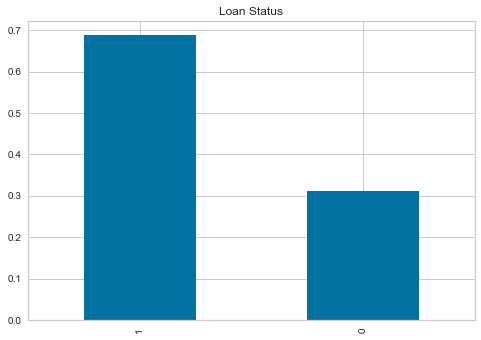

In [ ]:
train['Loan_Status'].value_counts(normalize=True).plot(kind='bar',title='Loan Status')
plt.savefig('DependentPercentage.png')

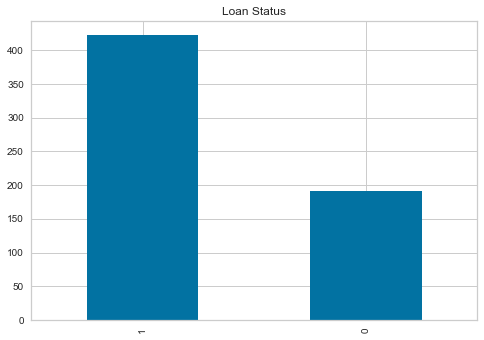

In [ ]:
train['Loan_Status'].value_counts().plot(kind='bar',title='Loan Status')
plt.savefig('DependentActual.png')

### Inferences 2 -  Data Visualization: 

#### 1.1 Indpendent Variable [Categorical Type] :
- Gender & Self_Employed Status doesn't make significant difference in getting Loan.
- If you are Married then more chances of getting Loan.

#### 1.2 Indpendent Variable [Ordinal Type] : 
- Parents with 2 Dependents have more chances of approval.
- If you are graduated than more chances of Loan approval.
- People owning property in Semi-Urban area have greater chances of Loan Approval

#### 1.3 Indpendent Variable [Numerical Type] : 
- Most of data is Right Skewed except Loan_Amount_Term
- Data also has some outliers present, thereby needs Data Transformation
- People having Credit History as per guidelines and Loan_Amount_Term of 1,5, & 10 Years have got Loan approval

#### 1.4 Dependent Variable [Target]
- Almost 70% have Loan Approved

#### *Conclusion from Training Data Analysis:*
- Gender and Self_Employed have no significant effect on Loan_Status
- If a person is **Graduated** having property in **Semi-Urban** area and is **Married** with 2 **Dependents** and Credit History as per **Guidelines** with Loan_Amount_Term of **1,5,10 Year** then **Loan is Approved**

### Hypothesis From Data : 
- It is not necessary that higher income means higher loan amount for both Applicant Income and Coapplicant Income
- Gender & Self_Employed is not a criteria for considering Loan Approval
- Higher Loan Amount Lesser the chance of getting Loan Approved

<AxesSubplot:>

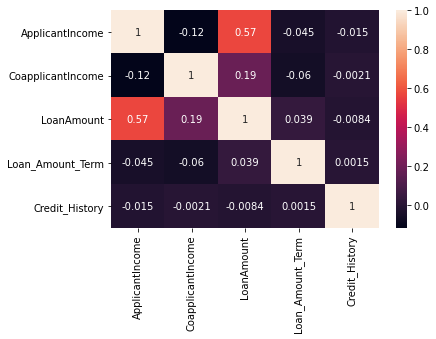

In [ ]:
sns.heatmap(train.corr(),annot=True)

There is no correlation between Independent Variables (Numerical) except LoanAmount and ApplicantIncome which have moderate Positive Correlation

## Treating Null Values

In [ ]:
train.isnull().sum(),test.isnull().sum()

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64,
 Loan_ID               0
 Gender               11
 Married               0
 Dependents           10
 Education             0
 Self_Employed        23
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount            5
 Loan_Amount_Term      6
 Credit_History       29
 Property_Area         0
 dtype: int64)

### Mode Imputation on Married | Gender

In [ ]:
# Married Imputed with Mode
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

# Gender Imputed with Mode
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace=True)
test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)

### Mapping Property_Area

In [ ]:
train["Property_Area"] = train["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})
test["Property_Area"] = test["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

### Conditional Class Imputation on Dependents | Credit_History | Self_Employed

In [ ]:
# Replace Null value in Dependents with 2 if Loan is Approved otherwise Dependents = 1 if Loan is Not Approved
train.loc[(train.Dependents.isnull())&(train.Loan_Status==1),'Dependents'] = '2'
train.loc[(train.Dependents.isnull()),'Dependents'] = '1'

test.loc[(test.Dependents.isnull())&(test.Credit_History==1),'Dependents'] = '2'
test.loc[(test.Dependents.isnull()),'Dependents'] = '1'

train["Dependents"] = train["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})
test["Dependents"] = test["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

# Credit_History = 1 have majority Loan Approved so we impute it inplace of NaN values otherwise Credit_History = 0
train.loc[(train.Credit_History.isnull())&(train.Loan_Status==1),'Credit_History'] = 1
train.loc[(train.Credit_History.isnull()),'Credit_History'] = 0

test['Credit_History'].fillna(test['Credit_History'].value_counts().index[0], inplace=True)
#In test data, for the user with income = 2733.
# To impute credit history as 0 based upon the Income to loan ratio 
test.loc[(test.ApplicantIncome == 2733),'Credit_History']  = 0

# Self-Employed = No if Credit History is 1 Else Yes
train.loc[(train.Self_Employed.isnull())&(train.Credit_History==1),'Self_Employed'] ='No'
train.loc[(train.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

test.loc[(test.Self_Employed.isnull())&(test.Credit_History==1),'Self_Employed'] ='No'
test.loc[(test.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [ ]:
# Loan_Amount_Term. Loan_Amount_Term depends upon married, education, self employed and dependent columns. 
# Hence we will group them by above features and impute median values.
# In case if the median is null then we will impute median of the entire Loan_Amount_Term column
Loan_Amount_Term_train_nan = list(train["Loan_Amount_Term"][train["Loan_Amount_Term"].isnull()].index)

for i in Loan_Amount_Term_train_nan :
    Loan_Amount_Term_train_med = train["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_train_impute = train["Loan_Amount_Term"][(((train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"])))].median()
    if not np.isnan(Loan_Amount_Term_train_impute) :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_train_impute
    else :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_train_med

In [ ]:
Loan_Amount_Term_test_nan = list(test["Loan_Amount_Term"][test["Loan_Amount_Term"].isnull()].index)

for i in Loan_Amount_Term_test_nan :
    Loan_Amount_Term_test_med = test["Loan_Amount_Term"].median() 
    Loan_Amount_Term_test_impute = test["Loan_Amount_Term"][(((test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"])))].median()
    if not np.isnan(Loan_Amount_Term_test_impute) :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_test_impute
    else :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_test_med 

In [ ]:
#  LoanAmount depends upon Property_Area, married, education, self employed and dependent columns.
# Hence we will group them by above features and imput median values.
# In case if the median is null then we will impute median of the entire LoanAmount column.
LoanAmount_train_nan = list(train["LoanAmount"][train["LoanAmount"].isnull()].index)

for i in LoanAmount_train_nan :
    LoanAmount_train_med = train["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_train_impute = train["LoanAmount"][((train['Property_Area'] == train.iloc[i]["Property_Area"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_train_impute) :
        train['LoanAmount'].iloc[i] = LoanAmount_train_impute
    else :
        train['LoanAmount'].iloc[i] = LoanAmount_train_med

In [ ]:
LoanAmount_test_nan = list(test["LoanAmount"][test["LoanAmount"].isnull()].index)

for i in LoanAmount_test_nan :
    LoanAmount_test_med = test["LoanAmount"].median()
    LoanAmount_test_impute = test["LoanAmount"][((test['Property_Area'] == test.iloc[i]["Property_Area"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_test_impute) :
        test['LoanAmount'].iloc[i] = LoanAmount_test_impute
    else :
        test['LoanAmount'].iloc[i] = LoanAmount_test_med

In [ ]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,89.0,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,2,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,2,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,1,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,2,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,1,N


In [ ]:
train.isnull().sum(),test.isnull().sum()

(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64,
 Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 dtype: int64)

## Treating Outliers

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

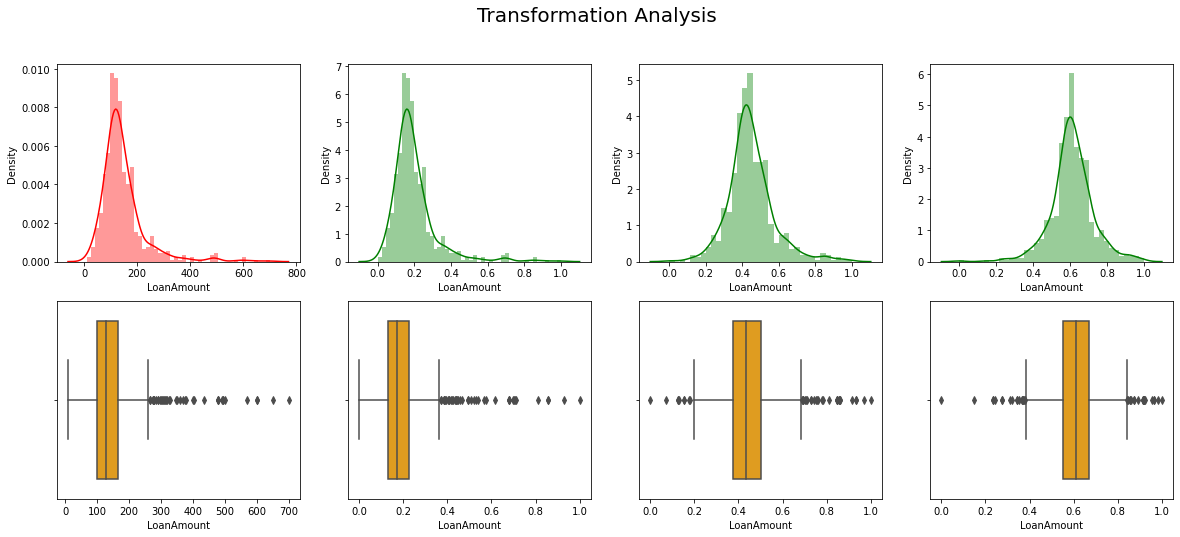

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['LoanAmount'],ax=axes[0,0],color='red')
sns.boxplot(train['LoanAmount'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['LoanAmount']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['LoanAmount']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['LoanAmount'],1/3)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['LoanAmount'],1/3)),ax=axes[1,2],color='orange')
sns.distplot(norm_func(np.log(train['LoanAmount'])),ax=axes[0,3],color='green')
sns.boxplot(norm_func(np.log(train['LoanAmount'])),ax=axes[1,3],color='orange')
plt.savefig('TransformationAnalysis_LoanAmount.png')

In [ ]:
norm_func(np.log(train['LoanAmount'])).skew(),norm_func(np.power(train['LoanAmount'],1/3)).skew(),norm_func(train['LoanAmount']).skew()

(-0.18984571980238207, 0.8571616404427818, 2.7297130434011105)

In [ ]:
train['LoanAmount_t'] = norm_func(np.log(train['LoanAmount']))
test['LoanAmount_t'] = norm_func(np.log(test['LoanAmount']))

<AxesSubplot:xlabel='Loan_Amount_Term'>

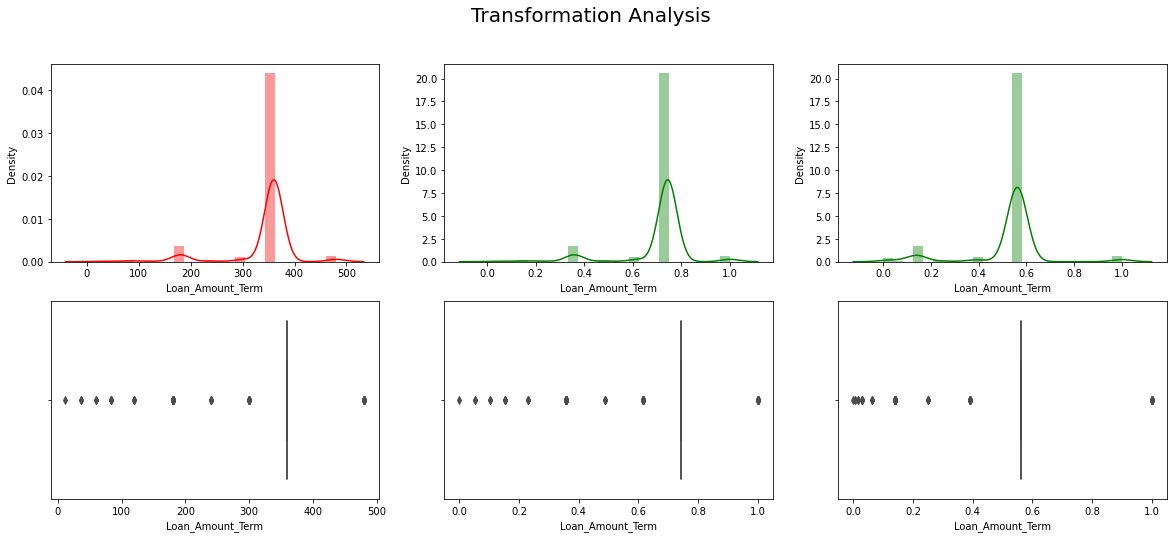

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,3, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['Loan_Amount_Term'],ax=axes[0,0],color='red')
sns.boxplot(train['Loan_Amount_Term'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['Loan_Amount_Term']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['Loan_Amount_Term']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['Loan_Amount_Term'],2)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['Loan_Amount_Term'],2)),ax=axes[1,2],color='orange')

In [ ]:
norm_func(np.power(train['Loan_Amount_Term'],2)).skew(),norm_func(train['Loan_Amount_Term']).skew(),train['Loan_Amount_Term'].skew()

(-1.1834204780266102, -2.402112256389037, -2.4021122563890396)

In [ ]:
train['Loan_Amount_Term_t'] = norm_func(np.power(train['Loan_Amount_Term'],2))
test['Loan_Amount_Term_t'] = norm_func(np.power(test['Loan_Amount_Term'],2))

<AxesSubplot:xlabel='ApplicantIncome'>

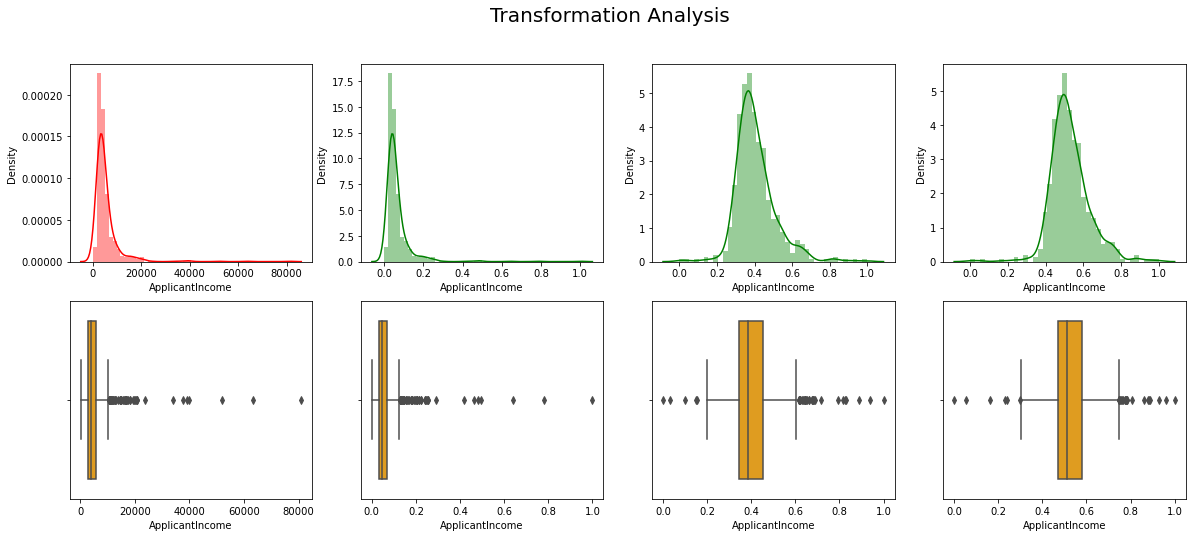

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['ApplicantIncome'],ax=axes[0,0],color='red')
sns.boxplot(train['ApplicantIncome'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['ApplicantIncome']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['ApplicantIncome']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['ApplicantIncome'],1/6)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['ApplicantIncome'],1/6)),ax=axes[1,2],color='orange')
sns.distplot(norm_func(np.log1p(train['ApplicantIncome'])),ax=axes[0,3],color='green')
sns.boxplot(norm_func(np.log1p(train['ApplicantIncome'])),ax=axes[1,3],color='orange')

In [ ]:
norm_func(np.log1p(train['ApplicantIncome'])).skew(),norm_func(np.power(train['ApplicantIncome'],1/6)).skew(),norm_func(train['ApplicantIncome']).skew()

(0.48212799537327766, 1.2920005018383758, 6.53951311399462)

In [ ]:
train['ApplicantIncome_t'] = norm_func(np.log1p(train['ApplicantIncome']))
test['ApplicantIncome_t'] = norm_func(np.log1p(test['ApplicantIncome']))

<AxesSubplot:xlabel='CoapplicantIncome'>

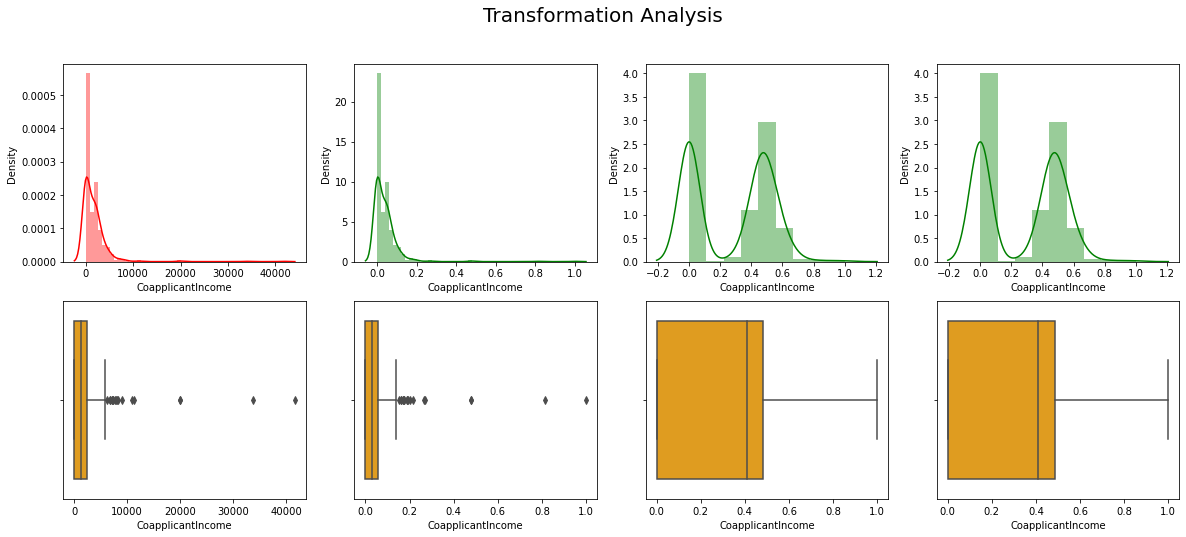

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['CoapplicantIncome'],ax=axes[0,0],color='red')
sns.boxplot(train['CoapplicantIncome'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['CoapplicantIncome']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['CoapplicantIncome']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['CoapplicantIncome'],1/4)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['CoapplicantIncome'],1/4)),ax=axes[1,2],color='orange')
sns.distplot(np.power(norm_func(train['CoapplicantIncome']),1/4),ax=axes[0,3],color='green')
sns.boxplot(np.power(norm_func(train['CoapplicantIncome']),1/4),ax=axes[1,3],color='orange')

In [ ]:
np.power(norm_func(train['CoapplicantIncome']),1/4).skew(),norm_func(np.power(train['CoapplicantIncome'],1/4)).skew(),norm_func(train['CoapplicantIncome']).skew()

(-0.008866025358752295, -0.008866025358752166, 7.491531216657308)

In [ ]:
train['CoapplicantIncome_t'] = np.power(norm_func(train['CoapplicantIncome']),1/4)
test['CoapplicantIncome_t'] = np.power(norm_func(test['CoapplicantIncome']),1/4)

## Feature Engineering - Deriving New Features:


- ###  TotalIncome = ApplicantIncome + CoapplicantIncome

- ###  EMI = LoanAmount / Loan_Amount_Term
    - But EMI also has interest rate and normally it is around 10% for monthly (10/100)/12 = 0.0083
    - EMI = P*r*(1+r)^n / (1+r)^ n-1
        - P = Principal Loan Amount
        - r = Rate of Interest
        - n = Tenure of repayment or Loan_Amount_Term

- ### Credit_History wise Total Income
    - Group Credit_History with sum of Total Income

- ### Dependents wise LoanAmount
    - Group Dependents with sum of LoanAmount
    
- ### Debt to Income Ratio
    - Ratio of LoanAmount to TotalIncome
    
- ### EMI to Loan_Amount_Term
    - Ratio of EMI to Loan_Amount_Term

- ### Property Grouping for Income Ratio
    - Group Property with Mean of Income Ratio


- Source for Interest Rate :  https://www.hdfc.com/housing-loans/home-loan-interest-rates)
- Source for EMI Formula : https://www.bajajfinserv.in/home-loan-emi-calculator

In [ ]:
train['TotalIncome'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='TotalIncome'>

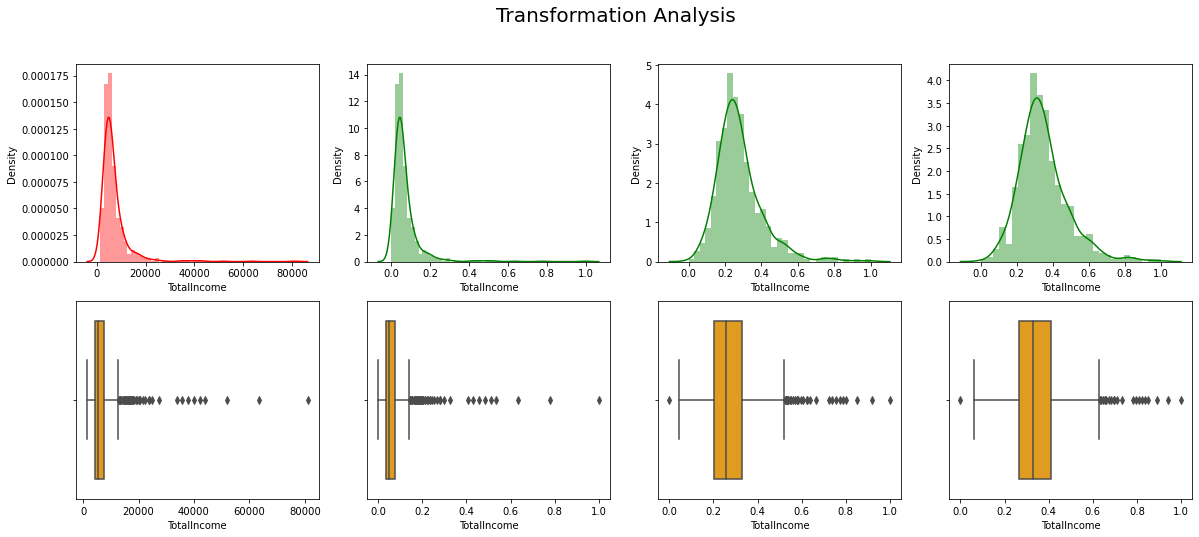

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['TotalIncome'],ax=axes[0,0],color='red')
sns.boxplot(train['TotalIncome'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['TotalIncome']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['TotalIncome']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['TotalIncome'],1/6)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['TotalIncome'],1/6)),ax=axes[1,2],color='orange')
sns.distplot(norm_func(np.log(train['TotalIncome'])),ax=axes[0,3],color='green')
sns.boxplot(norm_func(np.log(train['TotalIncome'])),ax=axes[1,3],color='orange')

In [ ]:
norm_func(np.log(train['TotalIncome'])).skew(),norm_func(np.power(train['TotalIncome'],1/6)).skew(),norm_func(train['TotalIncome']).skew()

(1.0767023443049915, 1.5578198390396494, 5.6334485148845355)

In [ ]:
train['TotalIncome_t'] = norm_func(np.log(train['TotalIncome']))
test['TotalIncome_t'] = norm_func(np.log(test['TotalIncome']))

In [ ]:
# As Loan Amount is given in Thousands
train['LoanAmount'] = train['LoanAmount'] * 1000
test['LoanAmount'] = test['LoanAmount'] * 1000

In [ ]:
# EMI = Pr(1+r)^n / (1+r)^ n-1
r = 0.0083
A = train['LoanAmount']*r*(1+r)**(train['Loan_Amount_Term'])
B = (1+r)**(train['Loan_Amount_Term']-1)
C = test['LoanAmount']*r*(1+r)**(test['Loan_Amount_Term'])
D = (1+r)**(test['Loan_Amount_Term']-1)
train['EMI']= (A/B)
test['EMI']= (C/D)

<AxesSubplot:xlabel='EMI'>

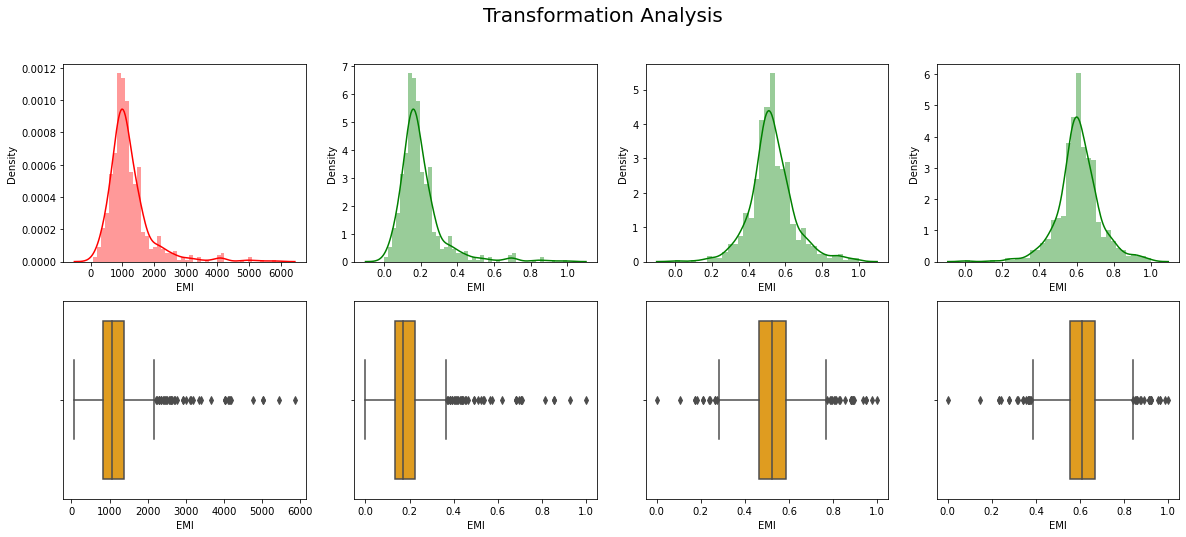

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['EMI'],ax=axes[0,0],color='red')
sns.boxplot(train['EMI'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['EMI']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['EMI']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['EMI'],1/6)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['EMI'],1/6)),ax=axes[1,2],color='orange')
sns.distplot(norm_func(np.log(train['EMI'])),ax=axes[0,3],color='green')
sns.boxplot(norm_func(np.log(train['EMI'])),ax=axes[1,3],color='orange')

In [ ]:
norm_func(np.log(train['EMI'])).skew(),norm_func(np.power(train['EMI'],1/6)).skew(),norm_func(train['EMI']).skew()

(-0.18984571980238257, 0.3577140746906507, 2.7297130434011105)

In [ ]:
train['EMI_t'] = norm_func(np.log(train['EMI']))
test['EMI_t'] = norm_func(np.log(test['EMI']))

In [ ]:
# Categorical variables wise sum of numerical columns
train['Credit_History_Income_Sum']=train.groupby(['Credit_History'])['TotalIncome'].transform('sum')
train['Dependents_LoanAmount_Sum']=train.groupby(['Dependents'])['LoanAmount'].transform('sum')
test['Credit_History_Income_Sum']=test.groupby(['Credit_History'])['TotalIncome'].transform('sum')
test['Dependents_LoanAmount_Sum']=test.groupby(['Dependents'])['LoanAmount'].transform('sum')

In [ ]:
# LoanAmount_per_Total_Income
train['LoanAmount_per_Total_Income']=train['LoanAmount']/train['TotalIncome']
test['LoanAmount_per_Total_Income']=test['LoanAmount']/test['TotalIncome']

In [ ]:
# EMI_per_Loan_Amount_Term
train['EMI_per_Loan_Amount_Term']=train['EMI']/train['Loan_Amount_Term']
test['EMI_per_Loan_Amount_Term']=test['EMI']/test['Loan_Amount_Term']

In [ ]:
# Categorical variables wise mean of LoanAmount_per_Total_Income
train['Property_Area_LoanAmount_per_Total_Income_mean']=train.groupby(['Property_Area'])['LoanAmount_per_Total_Income'].transform('mean')
test['Property_Area_LoanAmount_per_Total_Income_mean']=test.groupby(['Property_Area'])['LoanAmount_per_Total_Income'].transform('mean')

In [ ]:
# Forming Bins

Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
train['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(train['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)
test['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(test['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
train['Total_Income_Bins'] = Total_Income_discretizer.fit_transform(train['TotalIncome'].values.reshape(-1,1)).astype(float)
test['Total_Income_Bins'] = Total_Income_discretizer.fit_transform(test['TotalIncome'].values.reshape(-1,1)).astype(float)

LoanAmount_per_Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
train['LoanAmount_per_Total_Income_Bins'] = LoanAmount_per_Total_Income_discretizer.fit_transform(train['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)
test['LoanAmount_per_Total_Income_Bins'] = LoanAmount_per_Total_Income_discretizer.fit_transform(test['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)

In [ ]:
train.shape

(614, 29)

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_t', 'Loan_Amount_Term_t', 'ApplicantIncome_t',
       'CoapplicantIncome_t', 'TotalIncome', 'TotalIncome_t', 'EMI', 'EMI_t',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean',
       'Loan_Amount_Term_Bins', 'Total_Income_Bins',
       'LoanAmount_per_Total_Income_Bins'],
      dtype='object')

### Dropping Unwanted Columns

In [ ]:
train = train.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','CoapplicantIncome_t','TotalIncome','EMI'],axis=1)
test = test.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','CoapplicantIncome_t','TotalIncome','EMI'],axis=1)

## Converting Category to Numerical by Encoding

### Label Encoding Target Feature

In [ ]:
le = LabelEncoder()
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])

In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_t,Loan_Amount_Term_t,...,TotalIncome_t,EMI_t,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,LoanAmount_per_Total_Income,EMI_per_Loan_Amount_Term,Property_Area_LoanAmount_per_Total_Income_mean,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins
0,Male,No,0,Graduate,No,1.0,2,1,0.526295,0.562226,...,0.347590,0.526295,3.303519e+06,46657500.0,15.216276,2.068976,23.044516,1.0,2.0,0.0
1,Male,Yes,1,Graduate,No,1.0,0,0,0.609760,0.562226,...,0.357654,0.609760,3.303519e+06,18086500.0,21.014612,2.975605,24.070691,1.0,3.0,1.0
2,Male,Yes,0,Graduate,Yes,1.0,2,1,0.457624,0.562226,...,0.181853,0.457624,3.303519e+06,46657500.0,22.000000,1.534297,23.044516,1.0,0.0,1.0
3,Male,Yes,0,Not Graduate,No,1.0,2,1,0.594936,0.562226,...,0.305712,0.594936,3.303519e+06,46657500.0,24.286582,2.789630,23.044516,1.0,2.0,2.0
4,Male,No,0,Graduate,No,1.0,2,1,0.631977,0.562226,...,0.353918,0.631977,3.303519e+06,46657500.0,23.500000,3.277815,23.044516,1.0,2.0,2.0


In [ ]:
train['Total_Income_Bins'].value_counts()

4.0    125
1.0    123
0.0    123
2.0    122
3.0    121
Name: Total_Income_Bins, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gender                                          614 non-null    object 
 1   Married                                         614 non-null    object 
 2   Dependents                                      614 non-null    int64  
 3   Education                                       614 non-null    object 
 4   Self_Employed                                   614 non-null    object 
 5   Credit_History                                  614 non-null    float64
 6   Property_Area                                   614 non-null    int64  
 7   Loan_Status                                     614 non-null    int32  
 8   LoanAmount_t                                    614 non-null    float64
 9   Loan_Amount_Term_t                         

### One-Hot Encoding Independent Non-Ordinal Features

In [ ]:
train_ohe = train.loc[:,['Gender','Married','Education','Self_Employed']]
train_ohe = pd.get_dummies(train_ohe)
test_ohe = test.loc[:,['Gender','Married','Education','Self_Employed']]
test_ohe = pd.get_dummies(test_ohe)

train= pd.concat([train_ohe,train],axis=1)
test= pd.concat([test_ohe,test],axis=1)

In [ ]:
train.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Gender,Married,...,TotalIncome_t,EMI_t,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,LoanAmount_per_Total_Income,EMI_per_Loan_Amount_Term,Property_Area_LoanAmount_per_Total_Income_mean,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins
0,0,1,1,0,1,0,1,0,Male,No,...,0.347590,0.526295,3.303519e+06,46657500.0,15.216276,2.068976,23.044516,1.0,2.0,0.0
1,0,1,0,1,1,0,1,0,Male,Yes,...,0.357654,0.609760,3.303519e+06,18086500.0,21.014612,2.975605,24.070691,1.0,3.0,1.0
2,0,1,0,1,1,0,0,1,Male,Yes,...,0.181853,0.457624,3.303519e+06,46657500.0,22.000000,1.534297,23.044516,1.0,0.0,1.0
3,0,1,0,1,0,1,1,0,Male,Yes,...,0.305712,0.594936,3.303519e+06,46657500.0,24.286582,2.789630,23.044516,1.0,2.0,2.0
4,0,1,1,0,1,0,1,0,Male,No,...,0.353918,0.631977,3.303519e+06,46657500.0,23.500000,3.277815,23.044516,1.0,2.0,2.0


In [ ]:
test.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Gender,Married,...,TotalIncome_t,EMI_t,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,LoanAmount_per_Total_Income,EMI_per_Loan_Amount_Term,Property_Area_LoanAmount_per_Total_Income_mean,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins
0,0,1,0,1,1,0,1,0,Male,Yes,...,0.316956,0.459506,2004277,26085500.0,19.230769,2.557161,23.799187,1.0,3.0,1.0
1,0,1,0,1,1,0,1,0,Male,Yes,...,0.256950,0.505111,2004277,7969000.0,27.534965,2.929112,23.799187,1.0,1.0,3.0
2,0,1,0,1,1,0,1,0,Male,Yes,...,0.363465,0.673447,2004277,10051000.0,30.588235,4.835359,23.799187,1.0,3.0,4.0
3,0,1,0,1,1,0,1,0,Male,Yes,...,0.274577,0.427498,2004277,10051000.0,20.466639,2.324692,23.799187,1.0,2.0,1.0
4,0,1,1,0,0,1,1,0,Male,No,...,0.167078,0.344057,2004277,26085500.0,23.809524,1.813260,23.799187,1.0,0.0,2.0


In [ ]:
train=train.drop(['Gender','Married','Education','Self_Employed'],axis=1)
test=test.drop(['Gender','Married','Education','Self_Employed'],axis=1)
train.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Dependents,Credit_History,...,TotalIncome_t,EMI_t,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,LoanAmount_per_Total_Income,EMI_per_Loan_Amount_Term,Property_Area_LoanAmount_per_Total_Income_mean,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins
0,0,1,1,0,1,0,1,0,0,1.0,...,0.347590,0.526295,3.303519e+06,46657500.0,15.216276,2.068976,23.044516,1.0,2.0,0.0
1,0,1,0,1,1,0,1,0,1,1.0,...,0.357654,0.609760,3.303519e+06,18086500.0,21.014612,2.975605,24.070691,1.0,3.0,1.0
2,0,1,0,1,1,0,0,1,0,1.0,...,0.181853,0.457624,3.303519e+06,46657500.0,22.000000,1.534297,23.044516,1.0,0.0,1.0
3,0,1,0,1,0,1,1,0,0,1.0,...,0.305712,0.594936,3.303519e+06,46657500.0,24.286582,2.789630,23.044516,1.0,2.0,2.0
4,0,1,1,0,1,0,1,0,0,1.0,...,0.353918,0.631977,3.303519e+06,46657500.0,23.500000,3.277815,23.044516,1.0,2.0,2.0


#### New Features created have to also undergo Transformation

In [ ]:
train.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Dependents', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmount_t', 'Loan_Amount_Term_t',
       'ApplicantIncome_t', 'TotalIncome_t', 'EMI_t',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean',
       'Loan_Amount_Term_Bins', 'Total_Income_Bins',
       'LoanAmount_per_Total_Income_Bins'],
      dtype='object')

<AxesSubplot:xlabel='Credit_History_Income_Sum'>

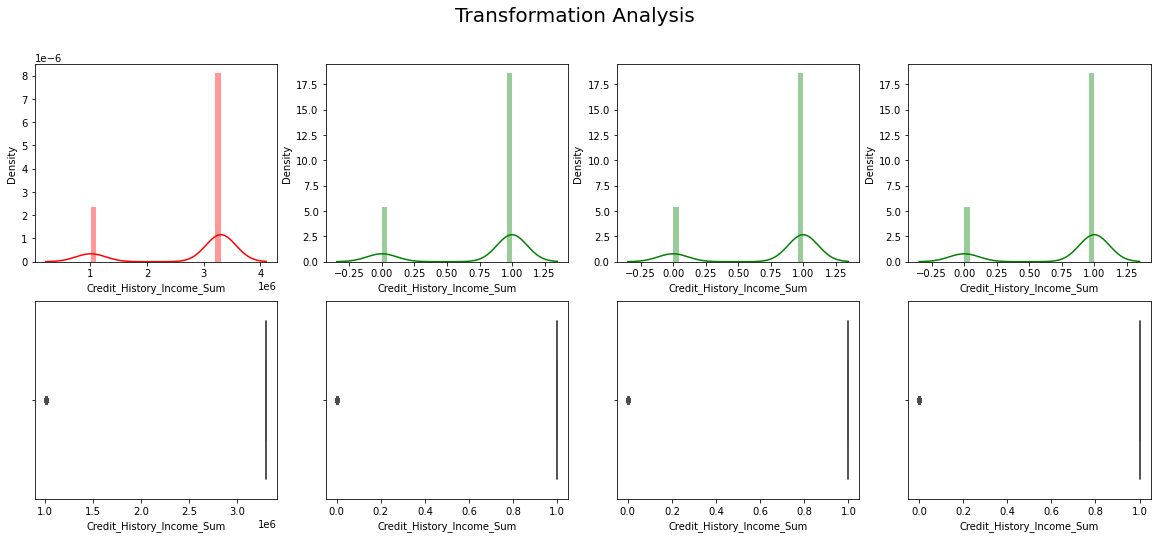

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['Credit_History_Income_Sum'],ax=axes[0,0],color='red')
sns.boxplot(train['Credit_History_Income_Sum'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['Credit_History_Income_Sum']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['Credit_History_Income_Sum']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['Credit_History_Income_Sum'],1/4)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['Credit_History_Income_Sum'],1/4)),ax=axes[1,2],color='orange')
sns.distplot(np.power(norm_func(train['Credit_History_Income_Sum']),1/4),ax=axes[0,3],color='green')
sns.boxplot(np.power(norm_func(train['Credit_History_Income_Sum']),1/4),ax=axes[1,3],color='orange')

In [ ]:
train['Credit_History_Income_Sum_t'] = norm_func(train['Credit_History_Income_Sum'])
test['Credit_History_Income_Sum_t'] = norm_func(test['Credit_History_Income_Sum'])

<AxesSubplot:xlabel='Dependents_LoanAmount_Sum'>

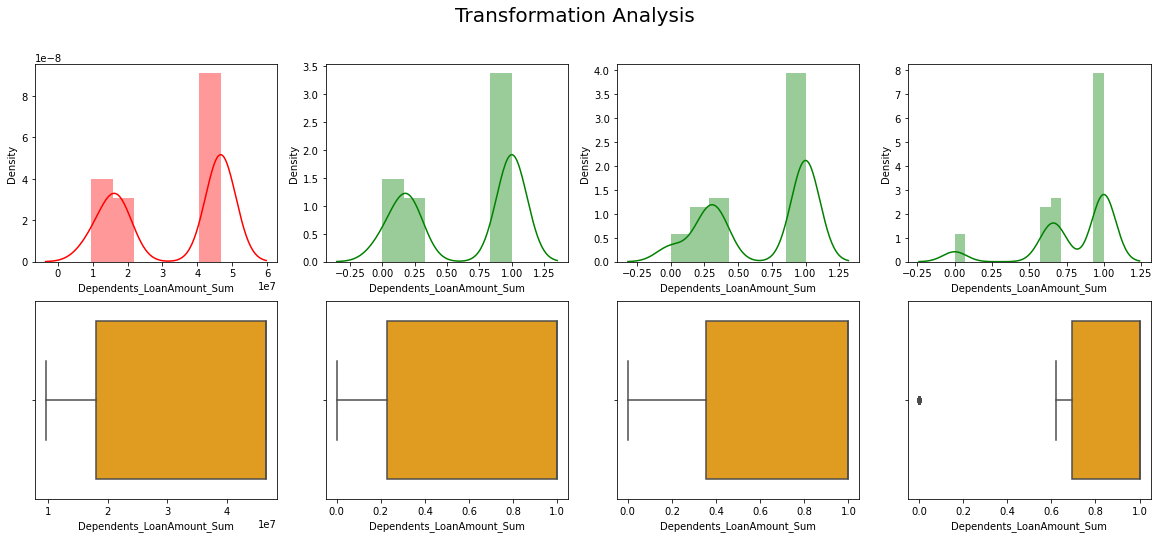

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['Dependents_LoanAmount_Sum'],ax=axes[0,0],color='red')
sns.boxplot(train['Dependents_LoanAmount_Sum'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['Dependents_LoanAmount_Sum']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['Dependents_LoanAmount_Sum']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['Dependents_LoanAmount_Sum'],1/4)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['Dependents_LoanAmount_Sum'],1/4)),ax=axes[1,2],color='orange')
sns.distplot(np.power(norm_func(train['Dependents_LoanAmount_Sum']),1/4),ax=axes[0,3],color='green')
sns.boxplot(np.power(norm_func(train['Dependents_LoanAmount_Sum']),1/4),ax=axes[1,3],color='orange')

In [ ]:
np.power(norm_func(train['Dependents_LoanAmount_Sum']),1/4).skew(),norm_func(np.power(train['Dependents_LoanAmount_Sum'],1/4)).skew(),norm_func(train['Dependents_LoanAmount_Sum']).skew()

(-1.6061581585387532, -0.4166210942945815, -0.30509330308795046)

In [ ]:
train['Dependents_LoanAmount_Sum_t'] = norm_func(train['Dependents_LoanAmount_Sum'])
test['Dependents_LoanAmount_Sum_t'] = norm_func(test['Dependents_LoanAmount_Sum'])

<AxesSubplot:xlabel='LoanAmount_per_Total_Income'>

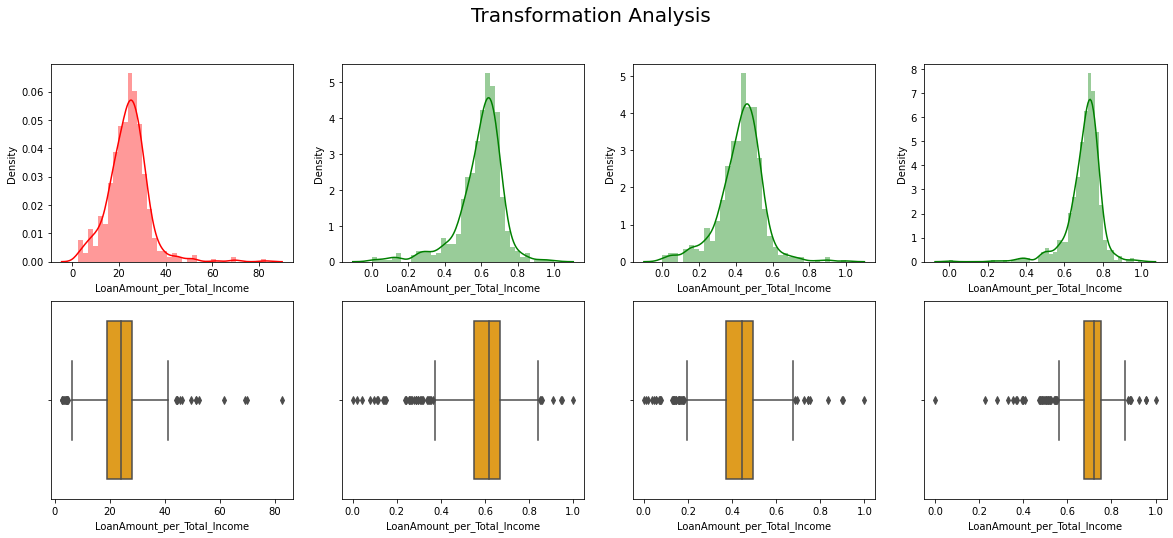

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['LoanAmount_per_Total_Income'],ax=axes[0,0],color='red')
sns.boxplot(train['LoanAmount_per_Total_Income'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(np.log1p(train['LoanAmount_per_Total_Income'])),ax=axes[0,1],color='green')
sns.boxplot(norm_func(np.log1p(train['LoanAmount_per_Total_Income'])),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['LoanAmount_per_Total_Income'],1/2)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['LoanAmount_per_Total_Income'],1/2)),ax=axes[1,2],color='orange')
sns.distplot(np.power(norm_func(train['LoanAmount_per_Total_Income']),1/4),ax=axes[0,3],color='green')
sns.boxplot(np.power(norm_func(train['LoanAmount_per_Total_Income']),1/4),ax=axes[1,3],color='orange')

In [ ]:
np.power(norm_func(train['LoanAmount_per_Total_Income']),1/4).skew(),norm_func(np.power(train['LoanAmount_per_Total_Income'],1/4)).skew(),norm_func(train['LoanAmount_per_Total_Income']).skew()

(-2.0625402190014364, -0.9849017693593916, 1.0957070111192015)

In [ ]:
train['LoanAmount_per_Total_Income_t'] = norm_func(np.power(train['LoanAmount_per_Total_Income'],1/4))
test['LoanAmount_per_Total_Income_t'] = norm_func(np.power(test['LoanAmount_per_Total_Income'],1/4))

<AxesSubplot:xlabel='EMI_per_Loan_Amount_Term'>

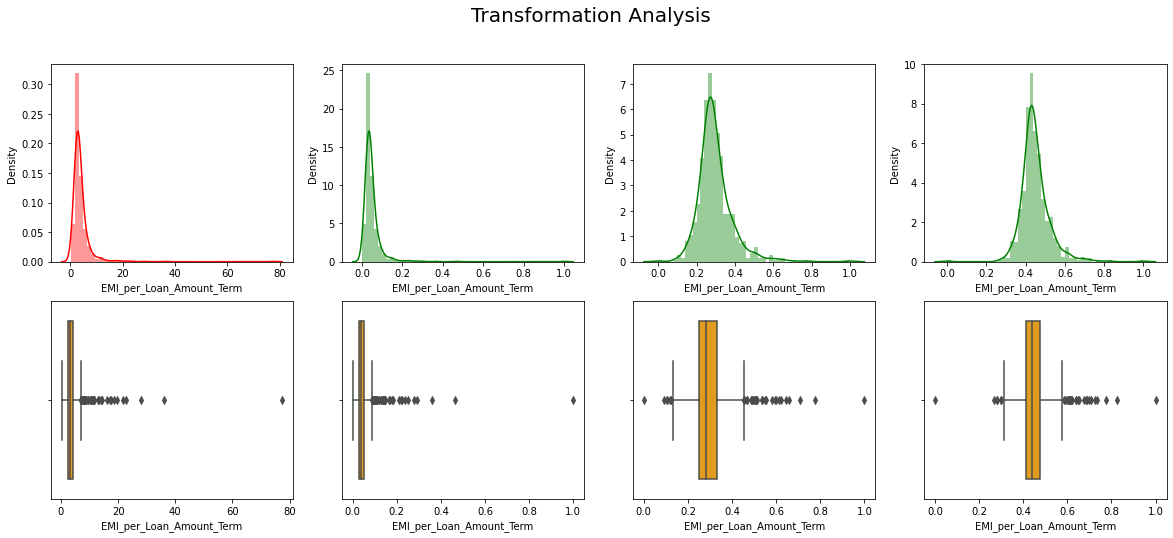

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['EMI_per_Loan_Amount_Term'],ax=axes[0,0],color='red')
sns.boxplot(train['EMI_per_Loan_Amount_Term'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['EMI_per_Loan_Amount_Term']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['EMI_per_Loan_Amount_Term']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['EMI_per_Loan_Amount_Term'],1/4)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['EMI_per_Loan_Amount_Term'],1/4)),ax=axes[1,2],color='orange')
sns.distplot(np.power(norm_func(train['EMI_per_Loan_Amount_Term']),1/4),ax=axes[0,3],color='green')
sns.boxplot(np.power(norm_func(train['EMI_per_Loan_Amount_Term']),1/4),ax=axes[1,3],color='orange')

In [ ]:
np.power(norm_func(train['EMI_per_Loan_Amount_Term']),1/4).skew(),norm_func(np.power(train['EMI_per_Loan_Amount_Term'],1/4)).skew(),norm_func(train['EMI_per_Loan_Amount_Term']).skew()

(1.328907144208448, 1.8999188364401747, 9.964785846563489)

In [ ]:
train['EMI_per_Loan_Amount_Term_t'] = norm_func(np.power(train['EMI_per_Loan_Amount_Term'],1/4))
test['EMI_per_Loan_Amount_Term_t'] = norm_func(np.power(test['EMI_per_Loan_Amount_Term'],1/4))

<AxesSubplot:xlabel='Property_Area_LoanAmount_per_Total_Income_mean'>

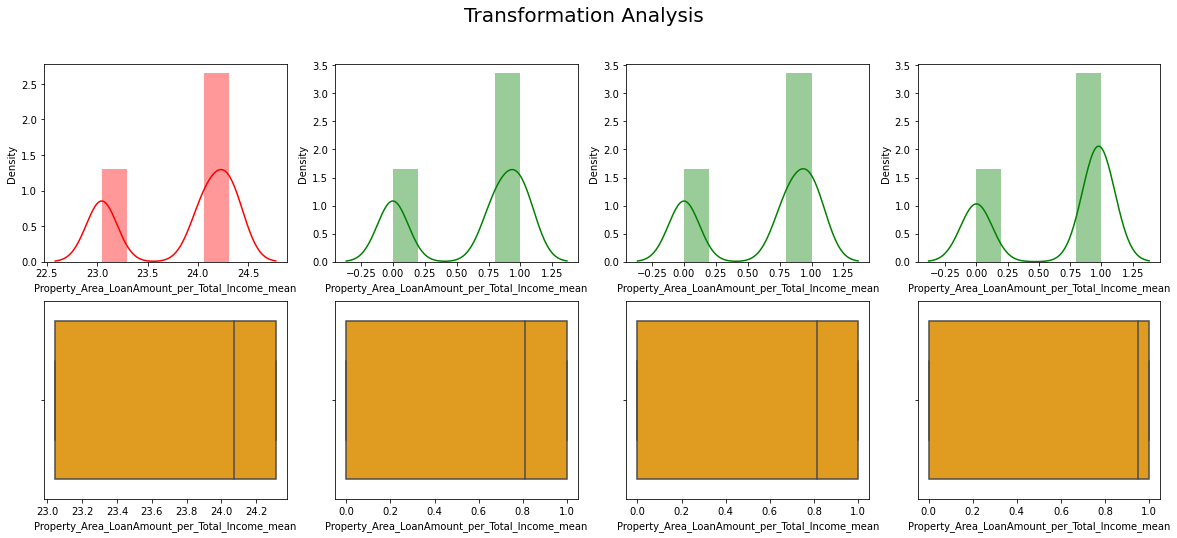

In [ ]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2,4, figsize=(20, 8))
fig.suptitle('Transformation Analysis',fontsize=20)
sns.distplot(train['Property_Area_LoanAmount_per_Total_Income_mean'],ax=axes[0,0],color='red')
sns.boxplot(train['Property_Area_LoanAmount_per_Total_Income_mean'],ax=axes[1,0],color='orange')
sns.distplot(norm_func(train['Property_Area_LoanAmount_per_Total_Income_mean']),ax=axes[0,1],color='green')
sns.boxplot(norm_func(train['Property_Area_LoanAmount_per_Total_Income_mean']),ax=axes[1,1],color='orange')
sns.distplot(norm_func(np.power(train['Property_Area_LoanAmount_per_Total_Income_mean'],1/4)),ax=axes[0,2],color='green')
sns.boxplot(norm_func(np.power(train['Property_Area_LoanAmount_per_Total_Income_mean'],1/4)),ax=axes[1,2],color='orange')
sns.distplot(np.power(norm_func(train['Property_Area_LoanAmount_per_Total_Income_mean']),1/4),ax=axes[0,3],color='green')
sns.boxplot(np.power(norm_func(train['Property_Area_LoanAmount_per_Total_Income_mean']),1/4),ax=axes[1,3],color='orange')

In [ ]:
train['Property_Area_LoanAmount_per_Total_Income_mean_t'] = norm_func(train['Property_Area_LoanAmount_per_Total_Income_mean'])
test['Property_Area_LoanAmount_per_Total_Income_mean_t'] = norm_func(test['Property_Area_LoanAmount_per_Total_Income_mean'])

In [ ]:
train.columns

Index(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Dependents', 'Credit_History', 'Property_Area',
       'Loan_Status', 'LoanAmount_t', 'Loan_Amount_Term_t',
       'ApplicantIncome_t', 'TotalIncome_t', 'EMI_t',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean',
       'Loan_Amount_Term_Bins', 'Total_Income_Bins',
       'LoanAmount_per_Total_Income_Bins', 'Credit_History_Income_Sum_t',
       'Dependents_LoanAmount_Sum_t', 'LoanAmount_per_Total_Income_t',
       'EMI_per_Loan_Amount_Term_t',
       'Property_Area_LoanAmount_per_Total_Income_mean_t'],
      dtype='object')

In [ ]:
train = pd.DataFrame(data=train,columns=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Dependents', 'Credit_History', 'Property_Area', 'LoanAmount_t', 'Loan_Amount_Term_t','ApplicantIncome_t', 'TotalIncome_t', 'EMI_t',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean',
       'Loan_Amount_Term_Bins', 'Total_Income_Bins',
       'LoanAmount_per_Total_Income_Bins', 'Credit_History_Income_Sum_t',
       'Dependents_LoanAmount_Sum_t', 'LoanAmount_per_Total_Income_t',
       'EMI_per_Loan_Amount_Term_t','Property_Area_LoanAmount_per_Total_Income_mean_t','Loan_Status'])
test = pd.DataFrame(data=test,columns=['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Dependents', 'Credit_History', 'Property_Area', 'LoanAmount_t', 'Loan_Amount_Term_t','ApplicantIncome_t', 'TotalIncome_t', 'EMI_t',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean',
       'Loan_Amount_Term_Bins', 'Total_Income_Bins',
       'LoanAmount_per_Total_Income_Bins', 'Credit_History_Income_Sum_t',
       'Dependents_LoanAmount_Sum_t', 'LoanAmount_per_Total_Income_t',
       'EMI_per_Loan_Amount_Term_t','Property_Area_LoanAmount_per_Total_Income_mean_t'])

In [ ]:
train = train.drop(['Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean'],axis=1)
test = test.drop(['Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'LoanAmount_per_Total_Income', 'EMI_per_Loan_Amount_Term',
       'Property_Area_LoanAmount_per_Total_Income_mean'],axis=1)

In [ ]:
train.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Dependents,Credit_History,...,EMI_t,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins,Credit_History_Income_Sum_t,Dependents_LoanAmount_Sum_t,LoanAmount_per_Total_Income_t,EMI_per_Loan_Amount_Term_t,Property_Area_LoanAmount_per_Total_Income_mean_t,Loan_Status
0,0,1,1,0,1,0,1,0,0,1.0,...,0.526295,1.0,2.0,0.0,1.0,1.000000,0.407162,0.228400,0.000000,1
1,0,1,0,1,1,0,1,0,1,1.0,...,0.609760,1.0,3.0,1.0,1.0,0.230006,0.501739,0.278210,0.809422,0
2,0,1,0,1,1,0,0,1,0,1.0,...,0.457624,1.0,0.0,1.0,1.0,1.000000,0.515792,0.190679,0.000000,1
3,0,1,0,1,0,1,1,0,0,1.0,...,0.594936,1.0,2.0,2.0,1.0,1.000000,0.546671,0.269030,0.000000,1
4,0,1,1,0,1,0,1,0,0,1.0,...,0.631977,1.0,2.0,2.0,1.0,1.000000,0.536305,0.292249,0.000000,1


In [ ]:
test.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Dependents,Credit_History,...,TotalIncome_t,EMI_t,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins,Credit_History_Income_Sum_t,Dependents_LoanAmount_Sum_t,LoanAmount_per_Total_Income_t,EMI_per_Loan_Amount_Term_t,Property_Area_LoanAmount_per_Total_Income_mean_t
0,0,1,0,1,1,0,1,0,0,1.0,...,0.316956,0.459506,1.0,3.0,1.0,1.0,1.000000,0.458443,0.115747,0.0
1,0,1,0,1,1,0,1,0,1,1.0,...,0.256950,0.505111,1.0,1.0,3.0,1.0,0.104540,0.556487,0.131803,0.0
2,0,1,0,1,1,0,1,0,2,1.0,...,0.363465,0.673447,1.0,3.0,4.0,1.0,0.207449,0.586917,0.196019,0.0
3,0,1,0,1,1,0,1,0,2,1.0,...,0.274577,0.427498,1.0,2.0,1.0,1.0,0.207449,0.474831,0.104800,0.0
4,0,1,1,0,0,1,1,0,0,1.0,...,0.167078,0.344057,1.0,0.0,2.0,1.0,1.000000,0.515717,0.077458,0.0


In [ ]:
test.isnull().sum()

Gender_Female                                       0
Gender_Male                                         0
Married_No                                          0
Married_Yes                                         0
Education_Graduate                                  0
Education_Not Graduate                              0
Self_Employed_No                                    0
Self_Employed_Yes                                   0
Dependents                                          0
Credit_History                                      0
Property_Area                                       0
LoanAmount_t                                        0
Loan_Amount_Term_t                                  0
ApplicantIncome_t                                   0
TotalIncome_t                                       0
EMI_t                                               0
Loan_Amount_Term_Bins                               0
Total_Income_Bins                                   0
LoanAmount_per_Total_Income_

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gender_Female                                     367 non-null    uint8  
 1   Gender_Male                                       367 non-null    uint8  
 2   Married_No                                        367 non-null    uint8  
 3   Married_Yes                                       367 non-null    uint8  
 4   Education_Graduate                                367 non-null    uint8  
 5   Education_Not Graduate                            367 non-null    uint8  
 6   Self_Employed_No                                  367 non-null    uint8  
 7   Self_Employed_Yes                                 367 non-null    uint8  
 8   Dependents                                        367 non-null    int64  
 9   Credit_History       

In [ ]:
train.isnull().sum()

Gender_Female                                       0
Gender_Male                                         0
Married_No                                          0
Married_Yes                                         0
Education_Graduate                                  0
Education_Not Graduate                              0
Self_Employed_No                                    0
Self_Employed_Yes                                   0
Dependents                                          0
Credit_History                                      0
Property_Area                                       0
LoanAmount_t                                        0
Loan_Amount_Term_t                                  0
ApplicantIncome_t                                   0
TotalIncome_t                                       0
EMI_t                                               0
Loan_Amount_Term_Bins                               0
Total_Income_Bins                                   0
LoanAmount_per_Total_Income_

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gender_Female                                     614 non-null    uint8  
 1   Gender_Male                                       614 non-null    uint8  
 2   Married_No                                        614 non-null    uint8  
 3   Married_Yes                                       614 non-null    uint8  
 4   Education_Graduate                                614 non-null    uint8  
 5   Education_Not Graduate                            614 non-null    uint8  
 6   Self_Employed_No                                  614 non-null    uint8  
 7   Self_Employed_Yes                                 614 non-null    uint8  
 8   Dependents                                        614 non-null    int64  
 9   Credit_History       

In [ ]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

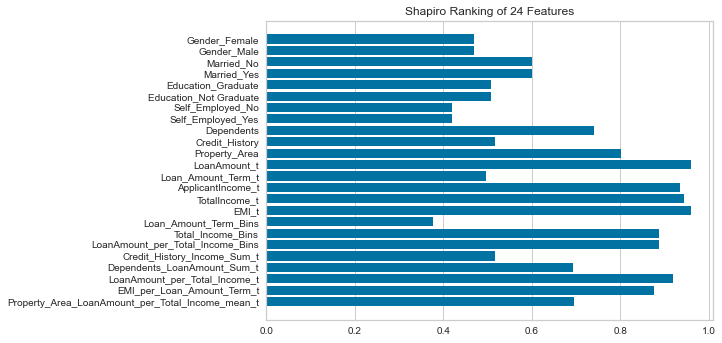

<AxesSubplot:title={'center':'Shapiro Ranking of 24 Features'}>

In [ ]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show() 

## Model Validation : Train-Test Split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=101)

## Model Validation : Stratified K-Fold Cross Validation

In [ ]:
sk = StratifiedKFold(n_splits = 10, shuffle=True, random_state = 101)

## Logistic Regression with HT

In [ ]:
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,5,10],
       'penalty':['l1','l2'],
        'solver':['liblinear','lbfgs']}
clf = GridSearchCV(model, grid, n_jobs=8,cv=10)
clf.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
clf.best_score_, clf.best_params_

(0.7703595980962452, {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'})

In [ ]:
model1 = LogisticRegression(C=0.1,penalty='l1',solver='liblinear',class_weight='balanced',random_state=101)
model1.fit(X,y)
result1 = cross_val_score(model1,X,y,cv=sk)
result1.mean()

0.7671337916446325

In [ ]:
model1_1 = LogisticRegression(C=0.1,penalty='l1',solver='liblinear',class_weight='balanced',random_state=101)
model1_1.fit(X_train,y_train)
result2 = model1_1.score(X_train,y_train)
result3 = model1_1.score(X_val,y_val)
result2,result3

(0.7780040733197556, 0.7398373983739838)

In [ ]:
print(classification_report(y_val,model1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        45
           1       0.76      0.86      0.81        78

    accuracy                           0.74       123
   macro avg       0.72      0.70      0.70       123
weighted avg       0.73      0.74      0.73       123



In [ ]:
accuracy_score(y_val,model1.predict(X_val))

0.7398373983739838

In [ ]:
roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.7716524216524215

In [ ]:
pd.crosstab(model1.predict(X_val),y_val)

Loan_Status,0,1
row_0,,
0,24,11
1,21,67


## Decision Tree with HT

In [ ]:
dtmodel = DecisionTreeClassifier(random_state=101)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]
gridparam = GridSearchCV(dtmodel,parameter)
gridparam.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [ ]:
gridparam.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

In [ ]:
model2 = DecisionTreeClassifier(random_state=101,max_depth=3,criterion='entropy',max_leaf_nodes=3,min_samples_split=3,min_samples_leaf=7)
model2.fit(X,y)
result4 = cross_val_score(model2,X,y,cv=sk)
result4.mean()

0.7817556848228451

In [ ]:
model2_1 = DecisionTreeClassifier(random_state=101,max_depth=3,criterion='entropy',max_leaf_nodes=3,min_samples_split=3,min_samples_leaf=7)
model2_1.fit(X_train,y_train)
result5 = model2_1.score(X_train,y_train)
result6 = model2_1.score(X_val,y_val)
result5,result6

(0.790224032586558, 0.7560975609756098)

In [ ]:
print(classification_report(y_val,model2_1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63        45
           1       0.78      0.86      0.82        78

    accuracy                           0.76       123
   macro avg       0.74      0.72      0.73       123
weighted avg       0.75      0.76      0.75       123



In [ ]:
roc_auc_score(y_val, model2_1.predict_proba(X_val)[:, 1])

0.7193732193732193

In [ ]:
pd.crosstab(model2_1.predict(X_val),y_val)

Loan_Status,0,1
row_0,,
0,26,11
1,19,67


## Cat Boost Classifier

In [ ]:
model3 = CatBoostClassifier(learning_rate = 0.005, 
                         max_depth = 10, 
                         l2_leaf_reg= 1,
                         random_state=42, 
                         task_type="CPU", 
                         devices="0:1", 
                         n_estimators=1000,
                         verbose=500)

model3.fit(X,y)

0:	learn: 0.6900081	total: 215ms	remaining: 3m 34s
500:	learn: 0.2240387	total: 21.8s	remaining: 21.8s
999:	learn: 0.1198100	total: 44.8s	remaining: 0us


In [ ]:
result7 = model3.score(X_train,y_train)
result8 = model3.score(X_val,y_val)
result7,result8

(0.9877800407331976, 1.0)

In [ ]:
print(classification_report(y_val,model3.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        78

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [ ]:
roc_auc_score(y_val, model3.predict_proba(X_val)[:, 1])

1.0

In [ ]:
result9 = cross_val_score(model3,X,y,cv=sk)
result9.mean()

0:	learn: 0.6897778	total: 50.1ms	remaining: 50s
500:	learn: 0.2098441	total: 22.2s	remaining: 22.2s
999:	learn: 0.1104634	total: 45.5s	remaining: 0us
0:	learn: 0.6902409	total: 51.2ms	remaining: 51.1s
500:	learn: 0.2034968	total: 23.5s	remaining: 23.5s
999:	learn: 0.1076320	total: 46.4s	remaining: 0us
0:	learn: 0.6907860	total: 31.7ms	remaining: 31.7s
500:	learn: 0.2103286	total: 21.5s	remaining: 21.4s
999:	learn: 0.1110276	total: 45.2s	remaining: 0us
0:	learn: 0.6906729	total: 32.3ms	remaining: 32.3s
500:	learn: 0.2153230	total: 21.7s	remaining: 21.7s
999:	learn: 0.1121419	total: 46s	remaining: 0us
0:	learn: 0.6909517	total: 24.2ms	remaining: 24.2s
500:	learn: 0.2077884	total: 22.1s	remaining: 22s
999:	learn: 0.1092153	total: 45.3s	remaining: 0us
0:	learn: 0.6910185	total: 13.7ms	remaining: 13.6s
500:	learn: 0.2085864	total: 21.8s	remaining: 21.7s
999:	learn: 0.1098134	total: 44.3s	remaining: 0us
0:	learn: 0.6909270	total: 13ms	remaining: 13s
500:	learn: 0.2011008	total: 21.3s	remain

0.7573770491803279

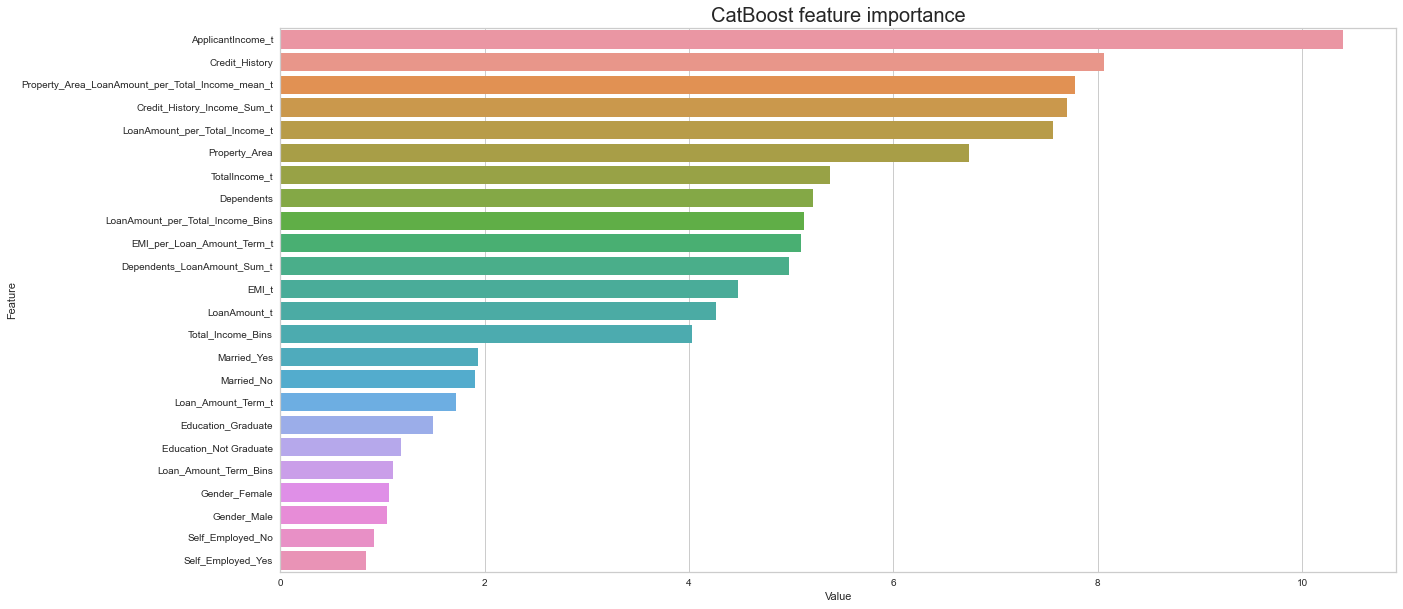

<Figure size 576x396 with 0 Axes>

In [ ]:
Dataset_plot = train.drop(["Loan_Status"],axis = 1)
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model3.feature_importances_,Dataset_plot.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost feature importance',size = 20)
#plt.tight_layout()
plt.show()
plt.savefig('selcttop15 Feature.png')

## Choosing Top 15 Features

In [ ]:
train1 = train.loc[:,['Married_Yes','Dependents', 'Credit_History', 'Property_Area', 'LoanAmount_t'
                      ,'ApplicantIncome_t', 'TotalIncome_t', 'EMI_t','Total_Income_Bins','LoanAmount_per_Total_Income_Bins', 'Credit_History_Income_Sum_t',
       'Dependents_LoanAmount_Sum_t', 'LoanAmount_per_Total_Income_t',
       'EMI_per_Loan_Amount_Term_t','Property_Area_LoanAmount_per_Total_Income_mean_t','Loan_Status']]
test1 = test.loc[:,['Married_Yes','Dependents', 'Credit_History', 'Property_Area', 'LoanAmount_t'
                      ,'ApplicantIncome_t', 'TotalIncome_t', 'EMI_t','Total_Income_Bins','LoanAmount_per_Total_Income_Bins', 'Credit_History_Income_Sum_t',
       'Dependents_LoanAmount_Sum_t', 'LoanAmount_per_Total_Income_t',
       'EMI_per_Loan_Amount_Term_t','Property_Area_LoanAmount_per_Total_Income_mean_t']]
train1.head()

,Married_Yes,Dependents,Credit_History,Property_Area,LoanAmount_t,ApplicantIncome_t,TotalIncome_t,EMI_t,Total_Income_Bins,LoanAmount_per_Total_Income_Bins,Credit_History_Income_Sum_t,Dependents_LoanAmount_Sum_t,LoanAmount_per_Total_Income_t,EMI_per_Loan_Amount_Term_t,Property_Area_LoanAmount_per_Total_Income_mean_t,Loan_Status
0,0,0,1.0,2,0.526295,0.581854,0.347590,0.526295,2.0,0.0,1.0,1.000000,0.407162,0.228400,0.000000,1
1,1,1,1.0,0,0.609760,0.543052,0.357654,0.609760,3.0,1.0,1.0,0.230006,0.501739,0.278210,0.809422,0
2,1,0,1.0,2,0.457624,0.475649,0.181853,0.457624,0.0,1.0,1.0,1.000000,0.515792,0.190679,0.000000,1
3,1,0,1.0,2,0.594936,0.451844,0.305712,0.594936,2.0,2.0,1.0,1.000000,0.546671,0.269030,0.000000,1
4,0,0,1.0,2,0.631977,0.585909,0.353918,0.631977,2.0,2.0,1.0,1.000000,0.536305,0.292249,0.000000,1


## Modeling with Top 15 Features & Up-sampling using SMOTE for solving Unbalanced Data

In [ ]:
X1 = train1.iloc[:,:-1]
y1 = train1.iloc[:,-1]

In [ ]:
smk = SMOTETomek(random_state=101)
X1_res,y1_res = smk.fit_resample(X1,y1)
X1.shape,y1.shape,X1_res.shape,y1_res.shape

((614, 15), (614,), (752, 15), (752,))

In [ ]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_res,y1_res,test_size=0.2,random_state=100)

## Logistic Regression with FE

In [ ]:
model4_2 = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,5,10],
       'penalty':['l2'],
        'solver':['liblinear','lbfgs','newton-cg', 'sag']}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf1 = GridSearchCV(model4_2, grid, n_jobs=8)
clf1.fit(X1_res,y1_res)

GridSearchCV(estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag']})

In [ ]:
clf1.best_score_, clf1.best_params_

(0.7593024282560706, {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'})

In [ ]:
model4 = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',class_weight='balanced',random_state=101)
model4.fit(X1_train,y1_train)
result10 = model4.score(X1_train,y1_train)
result11 = model4.score(X1_val,y1_val)
result10,result11

(0.7271214642262895, 0.7814569536423841)

In [ ]:
model4_1 = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',class_weight='balanced',random_state=101)
model4_1.fit(X1_res,y1_res)
result12 = cross_val_score(model4_1,X1_res,y1_res,cv=sk)
result12.mean()

0.7273508771929825

In [ ]:
print(classification_report(y1_val,model4_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        70
           1       0.76      0.85      0.80        81

    accuracy                           0.77       151
   macro avg       0.78      0.77      0.77       151
weighted avg       0.78      0.77      0.77       151



In [ ]:
roc_auc_score(y1_val, model4_1.predict_proba(X1_val)[:, 1])

0.8536155202821869

In [ ]:
pd.crosstab(y1_val,model4_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,48,22
1,12,69


## CATBoost Classifier with FE

In [ ]:
model5 = CatBoostClassifier(learning_rate = 0.005, 
                         max_depth = 10, 
                         l2_leaf_reg= 1,
                         random_state=27, 
                         task_type="CPU", 
                         devices="0:1", 
                         n_estimators=1000,
                         verbose=500)

model5_1 = CatBoostClassifier(learning_rate = 0.005, 
                         max_depth = 10, 
                         l2_leaf_reg= 1,
                         random_state=27, 
                         task_type="CPU", 
                         devices="0:1", 
                         n_estimators=1000,
                         verbose=500)

In [ ]:
model5.fit(X1_train,y1_train)
result13 = model5.score(X1_train,y1_train)
result14 = model5.score(X1_val,y1_val)
result13,result14

0:	learn: 0.6883235	total: 54.1ms	remaining: 54s
500:	learn: 0.1563258	total: 24.1s	remaining: 24s
999:	learn: 0.0724251	total: 49s	remaining: 0us


(1.0, 0.8410596026490066)

In [ ]:
model5_1.fit(X1_res,y1_res)
result15 = cross_val_score(model5_1,X1_res,y1_res,cv=sk)
result15.mean()

0:	learn: 0.6907311	total: 7.4ms	remaining: 7.4s
500:	learn: 0.1667040	total: 24.7s	remaining: 24.6s
999:	learn: 0.0808375	total: 49.4s	remaining: 0us
0:	learn: 0.6888227	total: 53.1ms	remaining: 53.1s
500:	learn: 0.1595850	total: 24.8s	remaining: 24.7s
999:	learn: 0.0736502	total: 50.4s	remaining: 0us
0:	learn: 0.6890484	total: 64.1ms	remaining: 1m 4s
500:	learn: 0.1704218	total: 26.8s	remaining: 26.7s
999:	learn: 0.0804550	total: 52.1s	remaining: 0us
0:	learn: 0.6907858	total: 5.09ms	remaining: 5.08s
500:	learn: 0.1677806	total: 25.8s	remaining: 25.7s
999:	learn: 0.0811029	total: 51.2s	remaining: 0us
0:	learn: 0.6881007	total: 68ms	remaining: 1m 7s
500:	learn: 0.1567168	total: 27.8s	remaining: 27.7s
999:	learn: 0.0743462	total: 55.5s	remaining: 0us
0:	learn: 0.6906226	total: 10.8ms	remaining: 10.8s
500:	learn: 0.1554327	total: 24.7s	remaining: 24.6s
999:	learn: 0.0742934	total: 50.2s	remaining: 0us
0:	learn: 0.6909341	total: 10.3ms	remaining: 10.3s
500:	learn: 0.1580875	total: 23.9s	

0.8509473684210527

In [ ]:
print(classification_report(y1_val,model5.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        70
           1       0.93      0.77      0.84        81

    accuracy                           0.84       151
   macro avg       0.85      0.85      0.84       151
weighted avg       0.86      0.84      0.84       151



In [ ]:
roc_auc_score(y1_val, model5.predict_proba(X1_val)[:, 1])

0.9289241622574955

In [ ]:
pd.crosstab(y1_val,model5.predict(X1_val))

col_0,0,1
Loan_Status,,
0,65,5
1,19,62


## Decision Tree with Feature Engineering

In [ ]:
dtmodel1 = DecisionTreeClassifier(random_state=101)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]
gridparam = GridSearchCV(dtmodel1,parameter)
gridparam.fit(X1_res,y1_res)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [ ]:
gridparam.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [ ]:
model6 = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
model6.fit(X1_res,y1_res)
result16 = cross_val_score(model6,X1_res,y1_res,cv=sk)
result16.mean()

0.7764736842105264

In [ ]:
model6_1 = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
model6_1.fit(X1_train,y1_train)
result17 = model6_1.score(X1_train,y1_train)
result18 = model6_1.score(X1_val,y1_val)
result17,result18

(0.8136439267886856, 0.7615894039735099)

In [ ]:
print(classification_report(y1_val,model6_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        70
           1       0.78      0.77      0.77        81

    accuracy                           0.76       151
   macro avg       0.76      0.76      0.76       151
weighted avg       0.76      0.76      0.76       151



In [ ]:
roc_auc_score(y1_val, model6_1.predict_proba(X1_val)[:, 1])

0.7537037037037035

In [ ]:
pd.crosstab(y1_val,model6_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,53,17
1,19,62


## Xgboost Classifier

In [ ]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5,8,12,15],
                'learning_rate': [0.01,0.025, 0.05, 0.1,1,10,15], 
                'n_estimators': [5,10,100, 200, 300, 400, 500], 
                'gamma': [0.1, 0.2,0.3,0.4],
                'min_child_weight' : [1,3,5,7,9,12,15,21]}

xgb_classifier = XGBClassifier()
modelxg = RandomizedSearchCV(xgb_classifier, tuned_params, n_iter=20, cv=10, n_jobs=-1)
modelxg.fit(X1_res,y1_res)

[14:33:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [ ]:
modelxg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=9, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=12, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

model7 = xgb_classifier.fit(X1_res,y1_res)
result19 = cross_val_score(model7,X1_res,y1_res,cv=sk)
result19.mean()

[14:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.7711578947368422

In [ ]:
model7_1 = xgb_classifier.fit(X1_train,y1_train)
result20 = model7_1.score(X1_train,y1_train)
result21 = model7_1.score(X1_val,y1_val)
result20,result21

[14:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.7970049916805324, 0.8211920529801324)

In [ ]:
print(classification_report(y1_val,model7_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        70
           1       0.83      0.84      0.83        81

    accuracy                           0.82       151
   macro avg       0.82      0.82      0.82       151
weighted avg       0.82      0.82      0.82       151



In [ ]:
roc_auc_score(y1_val, model7_1.predict_proba(X1_val)[:, 1])

0.8749559082892416

In [ ]:
pd.crosstab(y1_val,model7_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,56,14
1,13,68


## Ensemble Methods

In [ ]:
num1_trees = [100,200,300,400,500,600,700,800,900,1000]
cart1 = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
a = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',class_weight='balanced',random_state=101)
parameter = [{'base_estimator':[cart1,a],'n_estimators':num1_trees}]
gB_model = BaggingClassifier()
gridBagging = GridSearchCV(gB_model,parameter)
gridBagging.fit(X1_res,y1_res)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid=[{'base_estimator': [DecisionTreeClassifier(max_depth=6,
                                                                    max_leaf_nodes=9,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=3,
                                                                    random_state=101),
                                             LogisticRegression(C=0.1,
                                                                class_weight='balanced',
                                                                random_state=101,
                                                                solver='liblinear')],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}])

In [ ]:
gridBagging.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=6, max_leaf_nodes=9, min_samples_leaf=3,
                        min_samples_split=3, random_state=101),
 'n_estimators': 500}

In [ ]:
cart2 = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
model8 = BaggingClassifier(base_estimator=cart2,n_estimators=500)
model8.fit(X1_res,y1_res)
result22 = cross_val_score(model8,X1_res,y1_res,cv=sk)
result22.mean()

0.7911228070175439

In [ ]:
model8_1 = BaggingClassifier(base_estimator=cart2,n_estimators=300)
model8_1.fit(X1_train,y1_train)
result23 = model8_1.score(X1_train,y1_train)
result24 = model8_1.score(X1_val,y1_val)
result23,result24

(0.8369384359400999, 0.8013245033112583)

In [ ]:
print(classification_report(y1_val,model8_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        70
           1       0.81      0.81      0.81        81

    accuracy                           0.80       151
   macro avg       0.80      0.80      0.80       151
weighted avg       0.80      0.80      0.80       151



In [ ]:
roc_auc_score(y1_val, model8_1.predict_proba(X1_val)[:, 1])

0.8545855379188713

In [ ]:
pd.crosstab(y1_val,model8_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,55,15
1,15,66


## Adaboost Classifier

In [ ]:
cart2 = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
a = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',class_weight='balanced',random_state=101)
parameters = {'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1],'base_estimator':[cart2,a]}
ab_model = AdaBoostClassifier(random_state=101)
gridBoosting = GridSearchCV(ab_model,parameter)
gridBoosting.fit(X1_res,y1_res)

GridSearchCV(estimator=AdaBoostClassifier(random_state=101),
             param_grid=[{'base_estimator': [DecisionTreeClassifier(max_depth=6,
                                                                    max_leaf_nodes=9,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=3,
                                                                    random_state=101),
                                             LogisticRegression(C=0.1,
                                                                class_weight='balanced',
                                                                random_state=101,
                                                                solver='liblinear')],
                          'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                           800, 900, 1000]}])

In [ ]:
gridBoosting.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=6, max_leaf_nodes=9, min_samples_leaf=3,
                        min_samples_split=3, random_state=101),
 'n_estimators': 600}

In [ ]:
model9 = AdaBoostClassifier(base_estimator=cart2,n_estimators=600,learning_rate=0.0001,random_state=101)
model9.fit(X1_train,y1_train)
result25 = model9.score(X1_train,y1_train)
result26 = model9.score(X1_val,y1_val)
result25,result26

(0.8352745424292846, 0.7615894039735099)

In [ ]:
model9_1 = AdaBoostClassifier(base_estimator=cart2,n_estimators=600,learning_rate=0.0001,random_state=101)
model9_1.fit(X1_res,y1_res)
result27 = cross_val_score(model9_1,X1_res,y1_res,cv=sk)
result27.mean()

0.7831228070175439

In [ ]:
print(classification_report(y1_val,model9.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        70
           1       0.79      0.75      0.77        81

    accuracy                           0.76       151
   macro avg       0.76      0.76      0.76       151
weighted avg       0.76      0.76      0.76       151



In [ ]:
roc_auc_score(y1_val, model9.predict_proba(X1_val)[:, 1])

0.7953262786596119

In [ ]:
pd.crosstab(y1_val,model9.predict(X1_val))

col_0,0,1
Loan_Status,,
0,54,16
1,20,61


## Extra-Tree Classifier

In [ ]:
a=[3,4,5,6,7,8,9,10]
f=['sqrt','log2']
parameter = [{'criterion':['entropy','gini'],'max_depth':a,'min_samples_split':a,'max_features':f}]
model_eb = ExtraTreesClassifier(random_state=101)
gridextratree = GridSearchCV(model_eb,parameter)
gridextratree.fit(X1_res,y1_res)

GridSearchCV(estimator=ExtraTreesClassifier(random_state=101),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [ ]:
gridextratree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 6}

In [ ]:
model10 = ExtraTreesClassifier(n_estimators = 500,criterion ='gini', max_features = 'sqrt',max_depth=10,min_samples_split= 6)
model10.fit(X1_res,y1_res)
result28 = cross_val_score(model10,X1_res,y1_res,cv=sk)
result28.mean()

0.8190175438596491

In [ ]:
model10_1 = ExtraTreesClassifier(n_estimators = 500,criterion ='entropy', max_features = 2)
model10_1.fit(X1_train,y1_train)
result29 = model10_1.score(X1_train,y1_train)
result30 = model10_1.score(X1_val,y1_val)
result29,result30

(1.0, 0.8741721854304636)

In [ ]:
print(classification_report(y1_val,model10_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        70
           1       0.91      0.85      0.88        81

    accuracy                           0.87       151
   macro avg       0.87      0.88      0.87       151
weighted avg       0.88      0.87      0.87       151



In [ ]:
roc_auc_score(y1_val, model10_1.predict_proba(X1_val)[:, 1])

0.9342151675485009

In [ ]:
pd.crosstab(y1_val,model10_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,63,7
1,12,69


## Gradient Boosting Classifier

In [ ]:
a=[3,4,5,6,7,8,9,10]
parameter = [{'criterion':['friedman_mse', 'mse', 'mae'],'max_depth':a,'min_samples_split':a,'max_features':['auto','sqrt','log2']}]
eb_model = GradientBoostingClassifier(random_state=101)
gridgradboost = GridSearchCV(eb_model,parameter)
gridgradboost.fit(X1_res,y1_res)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid=[{'criterion': ['friedman_mse', 'mse', 'mae'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [ ]:
gridgradboost.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 3}

In [ ]:
model11 = GradientBoostingClassifier(max_depth=10,max_features='sqrt',min_samples_split=3,criterion='friedman_mse')
model11.fit(X1_res,y1_res)
result31 = cross_val_score(model11,X1_res,y1_res,cv=sk)
result31.mean()

0.8496315789473684

In [ ]:
model11_1 = GradientBoostingClassifier(max_depth=10,max_features='sqrt',min_samples_split=3,criterion='friedman_mse')
model11_1.fit(X1_train,y1_train)
result32 = model11_1.score(X1_train,y1_train)
result33 = model11_1.score(X1_val,y1_val)
result32,result33

(1.0, 0.7947019867549668)

In [ ]:
print(classification_report(y1_val,model11_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        70
           1       0.89      0.70      0.79        81

    accuracy                           0.79       151
   macro avg       0.81      0.80      0.79       151
weighted avg       0.81      0.79      0.79       151



In [ ]:
roc_auc_score(y1_val, model11_1.predict_proba(X1_val)[:, 1])

0.9160493827160494

In [ ]:
pd.crosstab(y1_val,model11_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,63,7
1,24,57


## NN

In [ ]:
# Defining different Layers
input_neurons = X1_train.shape[1]
output_neurons = 1
number_of_hidden_layers = 3
neuron_hidden_layer_1 = 50
neuron_hidden_layer_2 = 5

In [ ]:
model12 = Sequential()
model12.add(InputLayer(input_shape=(input_neurons,)))
model12.add(Dense(units=neuron_hidden_layer_1,activation = 'relu'))
model12.add(Dense(units=neuron_hidden_layer_2,activation = 'relu'))
model12.add(Dense(units=output_neurons,activation = 'sigmoid'))
model12.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                800       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 255       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model12.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Train the model
model_history = model12.fit(X1_train,y1_train,validation_data=(X1_val,y1_val),epochs=200)

Epoch 1/200
19/19 [==============================] - 5s 94ms/step - loss: 0.6967 - accuracy: 0.5277 - val_loss: 0.6527 - val_accuracy: 0.5960
Epoch 2/200
19/19 [==============================] - 0s 7ms/step - loss: 0.6615 - accuracy: 0.5903 - val_loss: 0.6278 - val_accuracy: 0.6954
Epoch 3/200
19/19 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.7081 - val_loss: 0.5946 - val_accuracy: 0.7550
Epoch 4/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5967 - accuracy: 0.7377 - val_loss: 0.5707 - val_accuracy: 0.7616
Epoch 5/200
19/19 [==============================] - 0s 5ms/step - loss: 0.5870 - accuracy: 0.7035 - val_loss: 0.5684 - val_accuracy: 0.7483
Epoch 6/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5688 - accuracy: 0.7493 - val_loss: 0.5541 - val_accuracy: 0.7616
Epoch 7/200
19/19 [==============================] - 0s 6ms/step - loss: 0.5691 - accuracy: 0.7390 - val_loss: 0.5466 - val_accuracy: 0.7748
Epoch 8/200


Epoch 59/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4554 - accuracy: 0.7908 - val_loss: 0.4951 - val_accuracy: 0.7616
Epoch 60/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4412 - accuracy: 0.8029 - val_loss: 0.4946 - val_accuracy: 0.7682
Epoch 61/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.8083 - val_loss: 0.5013 - val_accuracy: 0.7417
Epoch 62/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4589 - accuracy: 0.8075 - val_loss: 0.5022 - val_accuracy: 0.7483
Epoch 63/200
19/19 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.8077 - val_loss: 0.5047 - val_accuracy: 0.7351
Epoch 64/200
19/19 [==============================] - 0s 5ms/step - loss: 0.4713 - accuracy: 0.7975 - val_loss: 0.4771 - val_accuracy: 0.8013
Epoch 65/200
19/19 [==============================] - 0s 6ms/step - loss: 0.4502 - accuracy: 0.7725 - val_loss: 0.5047 - val_accuracy: 0.7351
Epoch 

19/19 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.8631 - val_loss: 0.4817 - val_accuracy: 0.7947
Epoch 117/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3425 - accuracy: 0.8694 - val_loss: 0.4865 - val_accuracy: 0.7616
Epoch 118/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3691 - accuracy: 0.8572 - val_loss: 0.4896 - val_accuracy: 0.7815
Epoch 119/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3807 - accuracy: 0.8613 - val_loss: 0.4717 - val_accuracy: 0.7881
Epoch 120/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3711 - accuracy: 0.8346 - val_loss: 0.4910 - val_accuracy: 0.7748
Epoch 121/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.8474 - val_loss: 0.4726 - val_accuracy: 0.7881
Epoch 122/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3765 - accuracy: 0.8550 - val_loss: 0.4755 - val_accuracy: 0.7947
Epoch 123/200

19/19 [==============================] - 0s 5ms/step - loss: 0.3334 - accuracy: 0.8737 - val_loss: 0.4545 - val_accuracy: 0.8146
Epoch 174/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3412 - accuracy: 0.8483 - val_loss: 0.4600 - val_accuracy: 0.8212
Epoch 175/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8615 - val_loss: 0.4670 - val_accuracy: 0.8146
Epoch 176/200
19/19 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.8860 - val_loss: 0.4799 - val_accuracy: 0.7947
Epoch 177/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.8858 - val_loss: 0.4644 - val_accuracy: 0.8278
Epoch 178/200
19/19 [==============================] - 0s 5ms/step - loss: 0.3304 - accuracy: 0.8798 - val_loss: 0.4835 - val_accuracy: 0.7881
Epoch 179/200
19/19 [==============================] - 0s 5ms/step - loss: 0.2816 - accuracy: 0.9150 - val_loss: 0.4765 - val_accuracy: 0.8146
Epoch 180/200

In [ ]:
# Evaluate model performance
prediction = model12.predict_classes(X1_val)
prediction1 = model12.predict_classes(X1_train)
result34 = accuracy_score(y1_train,prediction1)
result35 = accuracy_score(y1_val,prediction)
result34,result35

(0.9101497504159733, 0.7947019867549668)

## KNN Classifier

In [ ]:
kmodel = KNeighborsClassifier()
param_grid = [{'n_neighbors':range(2,40)}]
gsvkmodel = GridSearchCV(kmodel,param_grid)
gsvkmodel.fit(X1_res,y1_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(2, 40)}])

In [ ]:
gsvkmodel.best_params_,gsvkmodel.best_score_

({'n_neighbors': 3}, 0.7858631346578366)

In [ ]:
result_1 = []
result_2 = []
for n in range(2,20):
    modelk = KNeighborsClassifier(n_neighbors=n,metric='euclidean')
    modelk.fit(X1_train,y1_train)
    result_1.append(modelk.score(X1_train,y1_train))
    result_2.append(modelk.score(X1_val,y1_val))
frame = pd.DataFrame({'n_neighbors':range(2,20),'Train Accuracy':result_1,'Validation Accuracy':result_2})
frame

,n_neighbors,Train Accuracy,Validation Accuracy
0,2,0.891847,0.721854
1,3,0.895175,0.741722
2,4,0.848586,0.715232
3,5,0.851913,0.781457
4,6,0.828619,0.761589
5,7,0.843594,0.788079
6,8,0.821963,0.761589
7,9,0.825291,0.761589
8,10,0.811980,0.768212
9,11,0.818636,0.781457


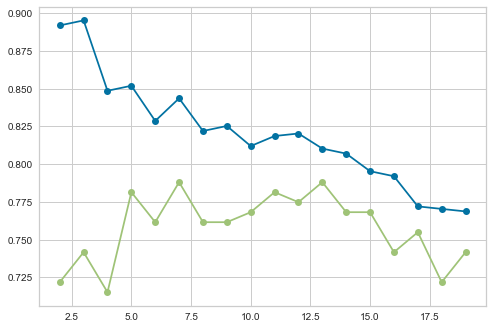

In [ ]:
plt.plot(frame['n_neighbors'],frame['Train Accuracy'],marker='o')
plt.plot(frame['n_neighbors'],frame['Validation Accuracy'],marker='o')

In [ ]:
model13 = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
model13.fit(X1_res,y1_res)
result36=cross_val_score(model13,X1_res,y1_res,cv=sk)
result36.mean()

0.7657543859649123

In [ ]:
model13_1 = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
model13_1.fit(X1_train,y1_train)
result37 = model13_1.score(X1_train,y1_train)
result38 = model13_1.score(X1_val,y1_val)
result37,result38

(0.8103161397670549, 0.7880794701986755)

In [ ]:
print(classification_report(y1_val,model13_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        70
           1       0.82      0.78      0.80        81

    accuracy                           0.79       151
   macro avg       0.79      0.79      0.79       151
weighted avg       0.79      0.79      0.79       151



In [ ]:
roc_auc_score(y1_val, model13_1.predict_proba(X1_val)[:, 1])

0.854320987654321

In [ ]:
pd.crosstab(y1_val,model13_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,56,14
1,18,63


## Naive Bayes Classifier

In [ ]:
model14 = GaussianNB()
model14.fit(X1_train,y1_train)
result39 = model14.score(X1_train,y1_train)
result40 = model14.score(X1_val,y1_val)
result39,result40

(0.7204658901830283, 0.7748344370860927)

In [ ]:
model14_1 = GaussianNB()
model14_1.fit(X1_res,y1_res)
result41=cross_val_score(model14_1, X1_res,y1_res,cv=sk)
result41.mean()

0.7166491228070175

In [ ]:
print(classification_report(y1_val,model14_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.89      0.60      0.72        70
           1       0.73      0.94      0.82        81

    accuracy                           0.78       151
   macro avg       0.81      0.77      0.77       151
weighted avg       0.81      0.78      0.77       151



In [ ]:
roc_auc_score(y1_val, model14_1.predict_proba(X1_val)[:, 1])

0.8446208112874779

In [ ]:
pd.crosstab(y1_val,model14_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,42,28
1,5,76


## Random Forest Classifier

In [ ]:
a = range(2,10)
parameter = [{'criterion':['gini','entropy'],'max_depth':a,'max_leaf_nodes':a,'min_samples_split':a,'max_features':['auto','sqrt','log2']}]
Rmodel = RandomForestClassifier()

In [ ]:
gridRF = GridSearchCV(Rmodel,parameter)
gridRF.fit(X1_res,y1_res)
gridRF.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'min_samples_split': 5}

In [ ]:
model15 = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=8, max_leaf_nodes=9,random_state=101,min_samples_split=5)
model15.fit(X1_res,y1_res)
result42 = cross_val_score(model15,X1_res,y1_res,cv=sk)
result42.mean()

0.791140350877193

In [ ]:
model15_1 = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=8, max_leaf_nodes=9,random_state=101,min_samples_split=5)
model15_1.fit(X1_train,y1_train)
result43 = model15_1.score(X1_train,y1_train)
result44 = model15_1.score(X1_val,y1_val)
result43,result44

(0.8352745424292846, 0.8013245033112583)

In [ ]:
print(classification_report(y1_val,model15_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77        70
           1       0.79      0.86      0.82        81

    accuracy                           0.80       151
   macro avg       0.80      0.80      0.80       151
weighted avg       0.80      0.80      0.80       151



In [ ]:
roc_auc_score(y1_val, model15_1.predict_proba(X1_val)[:, 1])

0.8680776014109347

In [ ]:
pd.crosstab(y1_val,model15_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,51,19
1,11,70


## SVM Classifier

In [ ]:
clf = SVC()
param_grid1 = [{'kernel':['rbf','poly'],'gamma':[1,0.1,0.01,0.001],'C':[50,25,15,10,5,1,0.1,0.01]}]
gsv = GridSearchCV(clf,param_grid1)
gsv.fit(X1_res,y1_res)
gsv.best_params_,gsv.best_score_

({'C': 10, 'gamma': 1, 'kernel': 'rbf'}, 0.816476821192053)

In [ ]:
model16 = SVC(kernel='rbf',C=10,gamma=1,probability=True)
model16.fit(X1_train,y1_train)
result45 = model16.score(X1_train,y1_train)
result46 = model16.score(X1_val,y1_val)
result45,result46

(0.9633943427620633, 0.7748344370860927)

In [ ]:
model16_1 = SVC(kernel='rbf',C=10,gamma=1)
model16_1.fit(X1_res,y1_res)
result47 = cross_val_score(model16_1,X1_res,y1_res,cv=sk)
result47.mean()

0.8256315789473684

In [ ]:
print(classification_report(y1_val,model16.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        70
           1       0.87      0.68      0.76        81

    accuracy                           0.77       151
   macro avg       0.79      0.78      0.77       151
weighted avg       0.79      0.77      0.77       151



In [ ]:
roc_auc_score(y1_val, model16.predict_proba(X1_val)[:, 1])

0.8701940035273369

In [ ]:
pd.crosstab(y1_val,model16.predict(X1_val))

col_0,0,1
Loan_Status,,
0,62,8
1,26,55


## Stacking

In [ ]:
estimators = []
model_1 = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',class_weight='balanced',random_state=101)
estimators.append(('Logistic Regression', model_1))
model_2 = DecisionTreeClassifier(random_state=101,max_depth=6,criterion='gini',max_leaf_nodes=9,min_samples_split=3,min_samples_leaf=3)
estimators.append(('Decision Tree', model_2))
model_3 = SVC(kernel='rbf',C=10,gamma=1,random_state=101)
estimators.append(('SVM', model_3))
model_4 = BaggingClassifier(base_estimator=cart2,n_estimators=300,random_state=101)
estimators.append(('Bagging Classifier', model_4))
model_5 = RandomForestClassifier(n_estimators=500,criterion='entropy', max_depth=8, max_leaf_nodes=9,random_state=101,min_samples_split=5)
estimators.append(('Random Forest Classifier', model_5))
model_6 = AdaBoostClassifier(base_estimator=cart2,n_estimators=600,learning_rate=0.0001,random_state=101)
estimators.append(('AdaBoost Classifier', model_6))

In [ ]:
model17 = VotingClassifier(estimators)
model17.fit(X1_res,y1_res)
result48 = cross_val_score(model17,X1_res,y1_res,cv=sk)
result48.mean() 

0.8004210526315789

In [ ]:
model17_1 = VotingClassifier(estimators)
model17_1.fit(X1_train,y1_train)
result49 = model17_1.score(X1_train,y1_train)
result50 = model17_1.score(X1_val,y1_val)
result49,result50

(0.8502495840266223, 0.7814569536423841)

In [ ]:
print(classification_report(y1_val,model17_1.predict(X1_val)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77        70
           1       0.80      0.79      0.80        81

    accuracy                           0.78       151
   macro avg       0.78      0.78      0.78       151
weighted avg       0.78      0.78      0.78       151



In [ ]:
pd.crosstab(y1_val,model17_1.predict(X1_val))

col_0,0,1
Loan_Status,,
0,54,16
1,17,64


## Model Summary

In [ ]:
Results = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','CatBoost','Logistic Regression','Catboost',
                                  'Decision Tree','Bagging Classifier','Random Forest Classifier','AdaBoost Classifier'
                                  ,'SVM','Stacking','Extra Tree Classifier','Gradient Boost Classifier',
                                  'Naive Bayes Classifier','KNN Classifier','XGBoost Classifier','Neural Network'],
                        'Stratified K-Fold Accuracy':[result1.mean(),result4.mean(),result9.mean(),result12.mean(),
                                                      result15.mean(),result16.mean(),result22.mean(),result42.mean(),
                                                      result27.mean(),result47.mean(),result28.mean(),result48.mean(),result31.mean(),
                                                      result41.mean(),result36.mean(),result19.mean(),'-'],
                        'Train Accuracy':[result2,result5,result7,result10,result13,result17,result23,result43,
                                          result25,result45,result49,result29,result32,result39,result37,result20,result34],
                        'Validation Accuracy':[result3,result6,result8,result11,result14,result18,result24,result44,
                                               result26,result46,result50,result30,result33,result40,result38,result21,result35]})
Results

,Models,Stratified K-Fold Accuracy,Train Accuracy,Validation Accuracy
0,Logistic Regression,0.767134,0.778004,0.739837
1,Decision Tree,0.781756,0.790224,0.756098
2,CatBoost,0.757377,0.987780,1.000000
3,Logistic Regression,0.727351,0.727121,0.781457
4,Catboost,0.850947,1.000000,0.841060
5,Decision Tree,0.776474,0.813644,0.761589
6,Bagging Classifier,0.791123,0.836938,0.801325
7,Random Forest Classifier,0.79114,0.835275,0.801325
8,AdaBoost Classifier,0.783123,0.835275,0.761589
9,SVM,0.825632,0.963394,0.774834


## Predict on Test Data

In [ ]:
Xtest = test1

In [ ]:
prediction = model11_1.predict(Xtest)

In [ ]:
submission = pd.read_csv('E:\Analytics Vidhya\Loan Prediction\sample_submission_49d68Cx.csv')

In [ ]:
submission['Loan_Status'] = prediction
submission['Loan_ID'] = test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('knncheck.csv',index=False)